In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import adjustText
from adjustText import adjust_text

In [2]:
def plot_beta(df, df_name):
    cumulative_pos = []
    running_pos = 0
    for chrom, group_df in df.groupby('CHR'):  
        cumulative_pos.append(group_df['BP'] + running_pos)
        running_pos += 100
        running_pos += group_df['BP'].max()

    df['cumulative_pos'] = pd.concat(cumulative_pos)
    g = sns.relplot(
        data = df,
        x = 'cumulative_pos',
        y = 'BETA_MEAN',
        aspect = 2.5,
        hue = 'CHR',
        palette = 'Paired',
        linewidth=0,
        legend=False
    )
    g.ax.set_xlabel('Chromosome')
    g.ax.set_xticks(df.groupby('CHR')['cumulative_pos'].mean())
    g.ax.set_xticklabels(df['CHR'].unique())
    g.ax.set_title(df_name + ' (%s SNPs)'%(df.shape[0]), size=13)
    
    annotations = df[abs(df['BETA_MEAN']) > 0.5].apply(lambda p : g.ax.annotate(p['SNP'], (p['cumulative_pos'], p['BETA_MEAN'])), axis=1).to_list()
    adjust_text(annotations)
    
    #adjust_text(annotations, arrowprops = {'arrowstyle' : '->', 'color' : 'black'})

## march ver

In [2]:
path = '/gpfs/commons/groups/knowles_lab/data/ADSP_reguloML/summary_stats/alzheimers/ADSP_reference_panel/fine_mapping/annotations_dl/aggregate_finemap/remove_index0/'
susie = pd.read_csv(path + 'bellenguez_susie.txt', sep = '\t')
baseline = pd.read_csv(path + 'bellenguez_baseline.txt', sep = '\t')
omics  = pd.read_csv(path + 'bellenguez_omics.txt', sep = '\t')
dl= pd.read_csv(path + 'bellenguez_omics_dl.txt', sep = '\t')

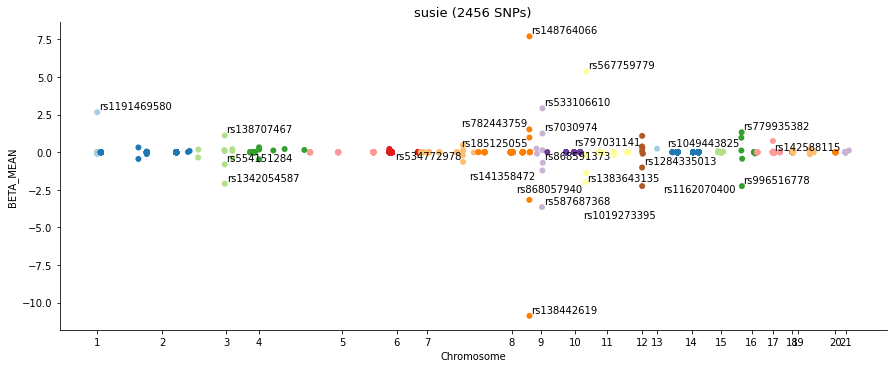

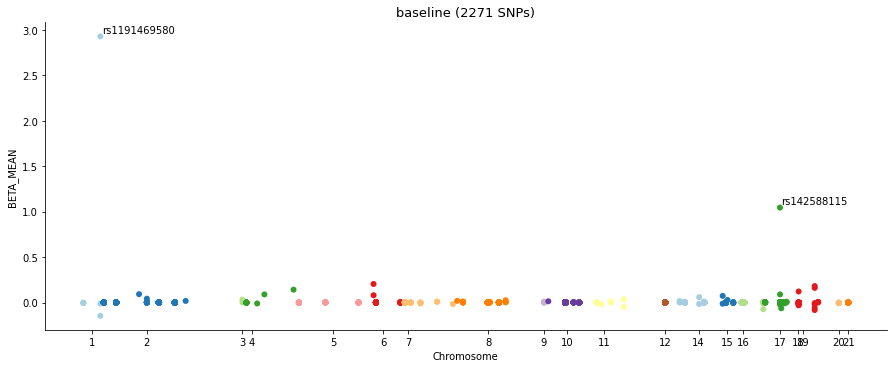

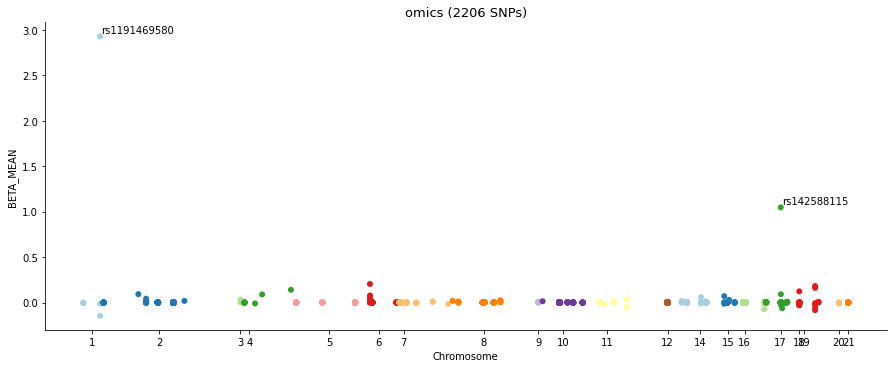

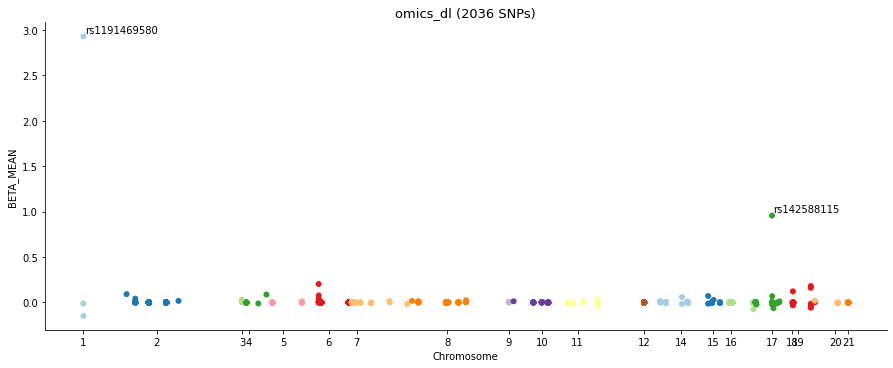

In [4]:
plot_beta(susie,'susie')
plot_beta(baseline,'baseline')
plot_beta(omics, 'omics')
plot_beta(dl, 'omics_dl')

In [13]:
print(abs(susie.BETA_MEAN).mean())
print(baseline.BETA_MEAN.mean())
print(omics.BETA_MEAN.mean())
print(dl.BETA_MEAN.mean())


0.02859699268115335
0.0021057099970412966
0.0022217662222715276
0.002288816313768926


In [14]:
susie[susie.BETA_MEAN>0.5]

,SNP,CHR,BP,A1,A2,MAF,N,Z,P,PIP,BETA_MEAN,BETA_SD,CREDIBLE_SET,cumulative_pos
1,rs1191469580,1,207544249,A,G,0.0003,42083,-0.411946,6.803790e-01,1.000000,2.662648,0.081626,chr1:206000001-209000001:1,207544249
313,rs138707467,3,90308518,C,T,0.0012,252054,2.376310,1.748680e-02,1.000000,1.118145,0.028868,chr3:89000001-92000001:3,535268986
735,rs782443759,8,142727318,C,G,0.0017,55361,1.701920,8.877070e-02,1.000000,1.517635,0.024449,chr8:141000001-144000001:2,1317794905
737,rs148764066,8,142943835,G,A,0.0006,252054,2.888750,3.867730e-03,1.000000,7.707427,0.041131,chr8:141000001-144000001:4,1318011422
739,rs185125055,8,142973512,G,C,0.0003,42083,-1.408180,1.590770e-01,1.000000,0.975876,0.058159,chr8:141000001-144000001:1,1318041099
751,rs533106610,9,32226910,G,A,0.0007,252054,4.225370,2.385440e-05,1.000000,2.920798,0.037840,chr9:31000001-34000001:3,1351393816
752,rs7030974,9,32230624,C,A,0.0013,252054,5.091670,3.549210e-07,0.883882,1.246366,0.452505,chr9:31000001-34000001:5,1351397530
807,rs567759779,11,14847009,C,G,0.0004,233257,4.499400,6.814580e-06,1.000000,5.381558,0.070556,chr11:13000001-16000001:1,1463452131
844,rs797031141,12,37419293,G,A,0.0007,42083,2.499580,1.243400e-02,0.999997,1.088998,0.038173,chr12:36000001-39000001:2,1607589293
1080,rs1049443825,16,46494555,C,G,0.0003,42083,2.504540,1.226120e-02,0.893272,0.967449,0.338802,chr16:45000001-48000001:4,1862521358


In [16]:
def plot_pip(df, df_name):
    cumulative_pos = []
    running_pos = 0
    for chrom, group_df in df.groupby('CHR'):  
        cumulative_pos.append(group_df['BP'] + running_pos)
        running_pos += group_df['BP'].max()

    df['cumulative_pos'] = pd.concat(cumulative_pos)
    g = sns.relplot(
        data = df,
        x = 'cumulative_pos',
        y = 'PIP',
        aspect = 2.5,
        hue = 'CHR',
        palette = 'Pastel1',
        linewidth=0,
        legend=False
    )
    g.ax.set_xlabel('Chromosome')
    g.ax.set_xticks(df.groupby('CHR')['cumulative_pos'].mean())
    g.ax.set_xticklabels(df['CHR'].unique())
    g.ax.set_title(df_name + ' (%s SNPs)'%(df.shape[0]), size=13)
    
    annotations = df[df.PIP > 0.95].apply(lambda p : g.ax.annotate(p['SNP'], (p['cumulative_pos'], p['PIP'])), axis=1).to_list()
    adjust_text(annotations, arrowprops = {'arrowstyle' : '->', 'color' : 'black'})

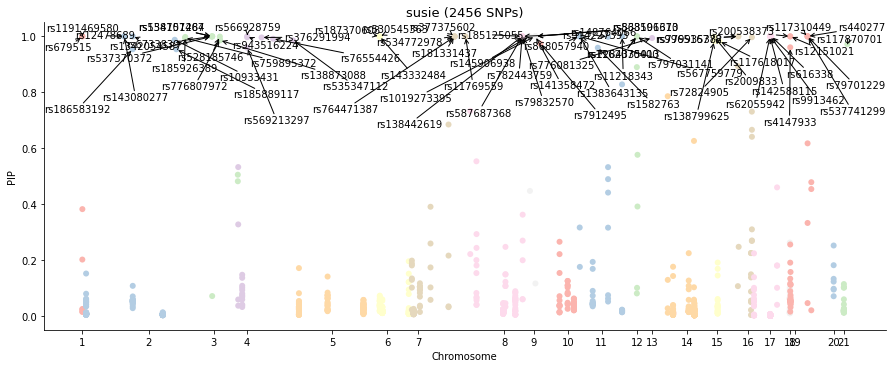

In [17]:
plot_pip(susie,'susie')

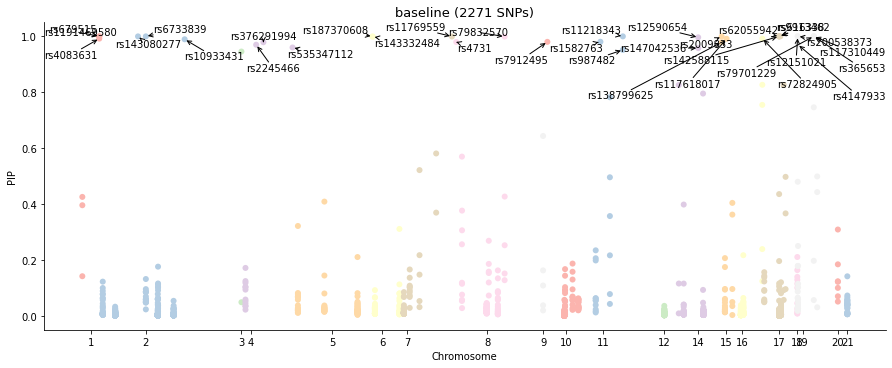

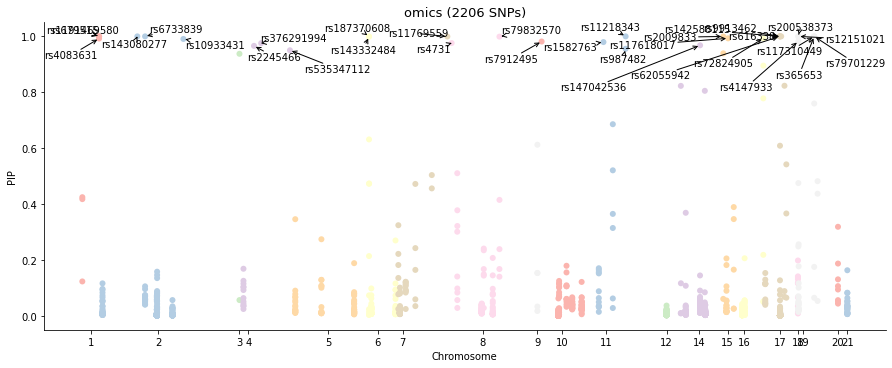

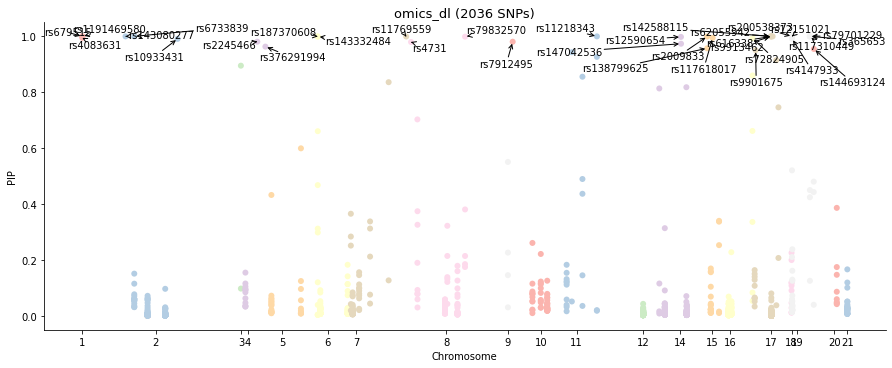

In [18]:
plot_pip(baseline,'baseline')
plot_pip(omics, 'omics')
plot_pip(dl, 'omics_dl')

In [23]:
susie_snp = susie[susie.PIP > 0.9]
baseline_snp = baseline[baseline.PIP > 0.9]
omics_snp = omics[omics.PIP > 0.9]
dl_snp = dl[dl.PIP > 0.9]
print(susie_snp.shape[0], baseline_snp.shape[0], omics_snp.shape[0], dl_snp.shape[0])

75 38 38 42


In [5]:
import upsetplot
from upsetplot import plot,from_contents
snp_list = from_contents({'susie':susie.SNP.tolist(),
                          'baseline':baseline.SNP.tolist(),
                          'omcis':omics.SNP.tolist(),
                          'omics_dl':dl.SNP.tolist()}
                         )

In [34]:
snp_list

id
susie baseline omcis omics_dl              
True  False    False False       rs12037841
      True     True  True      rs1191469580
      False    False False        rs1752684
      True     True  True          rs679515
      False    False False       rs10863417
...                                     ...
False False    False True        rs78556223
                     True        rs74531363
                     True        rs62063786
                     True         rs3752228
                     True       rs144693124

[3564 rows x 1 columns]

<Figure size 1080x432 with 0 Axes>

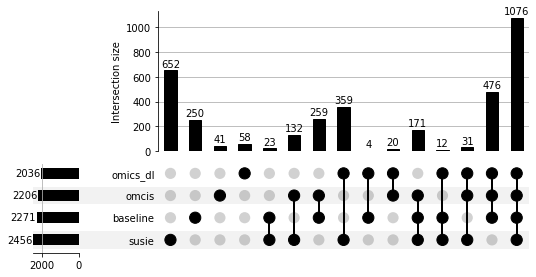

In [38]:
plt.figure(figsize=(15,6))
plot(snp_list , show_counts=True)
plt.savefig('/gpfs/commons/home/tlin/pic/PRS/snp_overlap_pip_0.9.pdf',transparent=True)

In [49]:
snp_list

id
susie baseline omcis omics_dl              
True  False    False False       rs12037841
      True     True  True      rs1191469580
      False    False False        rs1752684
      True     True  True          rs679515
      False    False False       rs10863417
...                                     ...
False False    False True        rs78556223
                     True        rs74531363
                     True        rs62063786
                     True         rs3752228
                     True       rs144693124

[3564 rows x 1 columns]

In [6]:
## only susie
susie_pip = snp_list.loc[(True, False, False,False)].values.reshape(-1)
susie_pip = susie[susie.SNP.isin(susie_pip)]
#susie_pip.to_csv(path + 'susie_snp.tsv', sep = '\t', index = False)

/gpfs/commons/home/tlin/.conda/envs/polyfun/lib/python3.6/site-packages/ipykernel_launcher.py:2: PerformanceWarning: indexing past lexsort depth may impact performance.
  


In [7]:
mutual_pip = snp_list.loc[(True, True,  True, True)].values.reshape(-1)
mutual_pip = susie[susie.SNP.isin(mutual_pip)]
#mutual_pip.to_csv(path + 'mutual_snp.tsv', sep = '\t', index = False)

/gpfs/commons/home/tlin/.conda/envs/polyfun/lib/python3.6/site-packages/ipykernel_launcher.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  """Entry point for launching an IPython kernel.


In [8]:
## functional
functional = snp_list.loc[(False,True, True,  True)].values.reshape(-1)
functional= baseline[baseline.SNP.isin(functional)]
#functional.to_csv(path + 'functional_snp.tsv', sep = '\t', index = False)

/gpfs/commons/home/tlin/.conda/envs/polyfun/lib/python3.6/site-packages/ipykernel_launcher.py:2: PerformanceWarning: indexing past lexsort depth may impact performance.
  


In [21]:
functional.shape

(476, 14)

In [64]:
snp_list.loc[(True, True,  True, True)].values.reshape(-1)

/gpfs/commons/home/tlin/.conda/envs/polyfun/lib/python3.6/site-packages/ipykernel_launcher.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  """Entry point for launching an IPython kernel.


array(['rs1191469580', 'rs679515', 'rs143080277', ..., 'rs1876062',
       'rs2829969', 'rs2829970'], dtype=object)

In [71]:
type(mutual_pip)

numpy.ndarray

In [70]:
mutual_pip = snp_list.loc[(True, True,  True, True)].values.reshape(-1)

/gpfs/commons/home/tlin/.conda/envs/polyfun/lib/python3.6/site-packages/ipykernel_launcher.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  """Entry point for launching an IPython kernel.


In [6]:
## get the upset r plot for snp with pip > 0.75

import upsetplot
from upsetplot import plot,from_contents

def data_upsetR(df):
    return df[df.PIP >=0.75].SNP.tolist()
snp_list = from_contents({'susie':data_upsetR(susie),
                          'baseline':data_upsetR(baseline),
                          'omcis':data_upsetR(omics),
                          'omics_dl':data_upsetR(dl)}
                         )

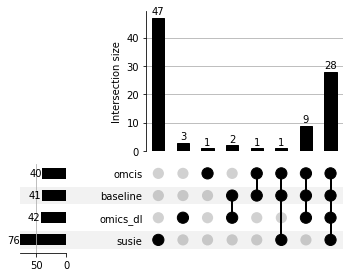

In [8]:

plot(snp_list , show_counts=True)
plt.savefig('/gpfs/commons/home/tlin/pic/PRS/snp_overlap_pip0.75.pdf',transparent=True)

In [42]:
#mutual ##28

mutual = snp_list.loc[(True, True,  True, True)].values.reshape(-1)
mutual = susie[susie.SNP.isin(mutual)]
mutual.to_csv(path + 'pip>0.75_mutual_snp.tsv', sep = '\t', index = False)
mutual

/gpfs/commons/home/tlin/.conda/envs/polyfun/lib/python3.6/site-packages/ipykernel_launcher.py:3: PerformanceWarning: indexing past lexsort depth may impact performance.
  This is separate from the ipykernel package so we can avoid doing imports until


,SNP,CHR,BP,A1,A2,MAF,N,Z,P,PIP,BETA_MEAN,BETA_SD,CREDIBLE_SET
1,rs1191469580,1,207544249,A,G,0.0003,42083,-0.411946,6.803790e-01,1.000000,2.662648,0.081626,chr1:206000001-209000001:1
3,rs679515,1,207577223,T,C,0.1877,283145,-11.961500,5.650520e-33,0.999999,-0.114896,0.014090,chr1:206000001-209000001:2
56,rs143080277,2,105749599,T,C,0.0051,277586,6.503320,7.856520e-11,1.000000,0.318012,0.013869,chr2:104000001-107000001:1
58,rs6733839,2,127135234,C,T,0.3891,283145,20.071400,1.311790e-89,1.000000,0.043215,0.002065,chr2:126000001-129000001:1
307,rs10933431,2,233117202,G,C,0.2343,282331,8.606060,7.561430e-18,0.987818,0.016862,0.002983,chr2:232000001-235000001:1
340,rs376291994,4,59984152,A,G,0.0034,281212,5.433720,5.519130e-08,0.996063,0.117818,0.018784,chr4:58000001-61000001:1
426,rs187370608,6,40974457,G,A,0.0031,275586,10.906800,1.069540e-27,0.999902,0.211331,0.018195,chr6:39000001-42000001:1
427,rs143332484,6,41161469,C,T,0.0126,282331,8.898940,5.638450e-19,0.999171,0.080402,0.009298,chr6:40000001-43000001:2
637,rs11769559,7,143414203,T,C,0.4059,277461,-8.176470,2.922790e-16,0.999518,-0.016290,0.002063,chr7:142000001-145000001:1
742,rs79832570,8,144042819,T,C,0.0885,282331,6.566670,5.145410e-11,0.999405,0.024956,0.003585,chr8:143000001-146000001:1


In [41]:
only_susie = snp_list.loc[(True, False, False, False)].values.reshape(-1)
only_susie  = susie[susie.SNP.isin(only_susie )]
only_susie.to_csv(path + 'pip>0.75_susie_snp.tsv', sep = '\t', index = False)
only_susie

/gpfs/commons/home/tlin/.conda/envs/polyfun/lib/python3.6/site-packages/ipykernel_launcher.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  """Entry point for launching an IPython kernel.


,SNP,CHR,BP,A1,A2,MAF,N,Z,P,PIP,BETA_MEAN,BETA_SD,CREDIBLE_SET
55,rs12478689,2,105736833,C,T,0.0017,251632,1.434670,1.513810e-01,1.000000,-0.446123,0.023980,chr2:104000001-107000001:2
57,rs186583192,2,127132858,G,A,0.0018,252054,-2.391580,1.677610e-02,0.953883,-0.120311,0.035181,chr2:126000001-129000001:2
308,rs185889117,2,237327083,A,T,0.0033,273836,5.247220,1.544120e-07,0.953845,0.088642,0.025974,chr2:236000001-239000001:1
309,rs759895372,3,21851278,G,T,0.0005,233257,-3.329300,8.706550e-04,0.994423,-0.350133,0.052045,chr3:20000001-23000001:2
310,rs185926389,3,22497284,C,T,0.0015,247869,4.563330,5.034900e-06,0.997891,0.178993,0.027276,chr3:21000001-24000001:1
311,rs537370372,3,89069280,A,G,0.0075,277461,4.423690,9.702710e-06,0.999427,0.142878,0.012141,chr3:88000001-91000001:1
312,rs554151284,3,90280130,G,A,0.0018,252054,-2.782150,5.399970e-03,1.000000,-0.808705,0.023577,chr3:89000001-92000001:2
313,rs138707467,3,90308518,C,T,0.0012,252054,2.376310,1.748680e-02,1.000000,1.118145,0.028868,chr3:89000001-92000001:3
315,rs1342054587,3,90468185,G,A,0.0003,42083,-2.273170,2.301570e-02,1.000000,-2.094579,0.057709,chr3:89000001-92000001:4
316,rs528185746,3,109749482,A,G,0.0010,242504,3.943110,8.043150e-05,0.999298,0.206983,0.032301,chr3:108000001-111000001:3


In [ ]:
bl = snp_list.loc[(True, False, False, False)].values.reshape(-1)
only_susie  = susie[susie.SNP.isin(only_susie )]
only_susie.to_csv(path + 'pip>0.75_susie_snp.tsv', sep = '\t', index = False)
only_susie

In [11]:
only_functional_snp = snp_list.loc[(False, True,  True, True)].values.reshape(-1)
only_functional = baseline[baseline.SNP.isin(only_functional_snp)]
only_functional.to_csv(path + 'pip>0.75_only_functional_snp_bl.tsv', sep = '\t', index = False)

only_functional = omics[omics.SNP.isin(only_functional_snp)]
only_functional.to_csv(path + 'pip>0.75_only_functional_snp_omics.tsv', sep = '\t', index = False)

only_functional = dl[dl.SNP.isin(only_functional_snp)]
only_functional.to_csv(path + 'pip>0.75_only_functional_snp_dl.tsv', sep = '\t', index = False)

/gpfs/commons/home/tlin/.conda/envs/polyfun/lib/python3.6/site-packages/ipykernel_launcher.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  """Entry point for launching an IPython kernel.


In [31]:
all_snps=snp_list.id.values

In [43]:
snp_list.id.to_csv(path + 'all_snps_rsid.txt',sep = '\t', header=None, index=False)

In [51]:
df1 = susie.loc[:,["SNP",'CHR','BP','A1','A2','MAF','N','Z','P','PIP']]
df2 = baseline.loc[:,["SNP",'CHR','BP','A1','A2','MAF','N','Z','P','PIP']]
df3 = omics.loc[:,["SNP",'CHR','BP','A1','A2','MAF','N','Z','P','PIP']]
df4 = dl.loc[:,["SNP",'CHR','BP','A1','A2','MAF','N','Z','P','PIP']]


In [62]:
all_snp = pd.concat([df1, df2, df3, df4], ignore_index=True)
all_snp[all_snp.PIP >=0.75].drop(['PIP'], axis = 1).drop_duplicates()

,SNP,CHR,BP,A1,A2,MAF,N,Z,P
1,rs1191469580,1,207544249,A,G,0.0003,42083,-0.411946,6.803790e-01
3,rs679515,1,207577223,T,C,0.1877,283145,-11.961500,5.650520e-33
55,rs12478689,2,105736833,C,T,0.0017,251632,1.434670,1.513810e-01
56,rs143080277,2,105749599,T,C,0.0051,277586,6.503320,7.856520e-11
57,rs186583192,2,127132858,G,A,0.0018,252054,-2.391580,1.677610e-02
...,...,...,...,...,...,...,...,...,...
4687,rs117310449,19,44890259,C,T,0.0169,281838,22.784000,6.607400e-115
6893,rs1160983,19,44893972,G,A,0.0295,282331,-19.282000,7.607740e-83
7522,rs1859788,7,100374211,A,G,0.3101,283145,8.556800,1.160440e-17
8156,rs9901675,17,7581494,G,A,0.0492,282331,-4.963000,6.941260e-07


In [66]:
#all_snp = all_snp[all_snp.PIP >=0.75].drop(['PIP'], axis = 1).drop_duplicates()
all_snp.to_csv(path + 'all_snps.txt',sep = '\t',  index=False)

In [65]:
all_snp

,SNP,CHR,BP,A1,A2,MAF,N,Z,P
1,rs1191469580,1,207544249,A,G,0.0003,42083,-0.411946,6.803790e-01
3,rs679515,1,207577223,T,C,0.1877,283145,-11.961500,5.650520e-33
55,rs12478689,2,105736833,C,T,0.0017,251632,1.434670,1.513810e-01
56,rs143080277,2,105749599,T,C,0.0051,277586,6.503320,7.856520e-11
57,rs186583192,2,127132858,G,A,0.0018,252054,-2.391580,1.677610e-02
...,...,...,...,...,...,...,...,...,...
4687,rs117310449,19,44890259,C,T,0.0169,281838,22.784000,6.607400e-115
6893,rs1160983,19,44893972,G,A,0.0295,282331,-19.282000,7.607740e-83
7522,rs1859788,7,100374211,A,G,0.3101,283145,8.556800,1.160440e-17
8156,rs9901675,17,7581494,G,A,0.0492,282331,-4.963000,6.941260e-07


In [12]:
##only dl
snp_list.loc[(False, False, False, True)].values.reshape(-1)

/gpfs/commons/home/tlin/.conda/envs/polyfun/lib/python3.6/site-packages/ipykernel_launcher.py:2: PerformanceWarning: indexing past lexsort depth may impact performance.
  


array(['rs1859788', 'rs9901675', 'rs144693124'], dtype=object)

In [13]:
#Only omics
snp_list.loc[(False, False, True, False)].values.reshape(-1)

/gpfs/commons/home/tlin/.conda/envs/polyfun/lib/python3.6/site-packages/ipykernel_launcher.py:2: PerformanceWarning: indexing past lexsort depth may impact performance.
  


array(['rs1160983'], dtype=object)

In [15]:
#Only baseline dl
print(snp_list.loc[(False, True, False, True)].values.reshape(-1))

##only omics bl
print(snp_list.loc[(False, True, True, False)].values.reshape(-1))

##only omics bl susie
print(snp_list.loc[(True, True, True, False)].values.reshape(-1))


['rs10792832' 'rs12590654']
['rs4407053']
['rs535347112']


/gpfs/commons/home/tlin/.conda/envs/polyfun/lib/python3.6/site-packages/ipykernel_launcher.py:2: PerformanceWarning: indexing past lexsort depth may impact performance.
  
/gpfs/commons/home/tlin/.conda/envs/polyfun/lib/python3.6/site-packages/ipykernel_launcher.py:5: PerformanceWarning: indexing past lexsort depth may impact performance.
  """
/gpfs/commons/home/tlin/.conda/envs/polyfun/lib/python3.6/site-packages/ipykernel_launcher.py:8: PerformanceWarning: indexing past lexsort depth may impact performance.
  


In [9]:
## check maf

In [10]:
susie_pip

,SNP,CHR,BP,A1,A2,MAF,N,Z,P,PIP,BETA_MEAN,BETA_SD,CREDIBLE_SET,cumulative_pos
0,rs12037841,1,207510847,T,G,0.1888,283145,-11.86540,1.790780e-32,0.201620,-0.005907,0.011854,chr1:206000001-209000001:3,207510847
2,rs1752684,1,207573951,A,G,0.1923,283145,-11.60190,4.028330e-31,0.024769,-0.000718,0.004553,chr1:206000001-209000001:3,207573951
4,rs10863417,1,207623552,A,T,0.1898,283145,-11.64080,2.556770e-31,0.022745,-0.000651,0.004281,chr1:206000001-209000001:3,207623552
5,rs10863418,1,207624893,C,G,0.1965,283145,-11.65690,2.117000e-31,0.014597,-0.000411,0.003387,chr1:206000001-209000001:3,207624893
6,rs4844610,1,207629207,A,C,0.1859,283145,-11.90380,1.130160e-32,0.382038,-0.011268,0.014432,chr1:206000001-209000001:3,207629207
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2417,rs587709,19,54267597,C,T,0.3251,282331,-5.48000,4.253260e-08,0.020152,-0.000222,0.001575,chr19:53000001-56000001:1,2047868535
2425,rs7277389,21,25836105,T,C,0.4138,278275,-4.52381,6.073640e-06,0.011018,-0.000104,0.001013,chr21:24000001-27000001:1,2130128328
2431,rs2829948,21,25846915,G,A,0.4160,283145,-4.65854,3.184650e-06,0.018118,-0.000176,0.001322,chr21:24000001-27000001:1,2130139138
2450,rs9980932,21,25877114,C,T,0.4749,283145,-4.51220,6.416010e-06,0.013195,-0.000124,0.001101,chr21:24000001-27000001:1,2130169337


In [11]:
mutual_pip

,SNP,CHR,BP,A1,A2,MAF,N,Z,P,PIP,BETA_MEAN,BETA_SD,CREDIBLE_SET,cumulative_pos
1,rs1191469580,1,207544249,A,G,0.0003,42083,-0.411946,6.803790e-01,1.000000,2.662648,0.081626,chr1:206000001-209000001:1,207544249
3,rs679515,1,207577223,T,C,0.1877,283145,-11.961500,5.650520e-33,0.999999,-0.114896,0.014090,chr1:206000001-209000001:2,207577223
56,rs143080277,2,105749599,T,C,0.0051,277586,6.503320,7.856520e-11,1.000000,0.318012,0.013869,chr2:104000001-107000001:1,313383084
58,rs6733839,2,127135234,C,T,0.3891,283145,20.071400,1.311790e-89,1.000000,0.043215,0.002065,chr2:126000001-129000001:1,334768719
61,rs35400498,2,127143138,G,T,0.2453,283145,2.757890,5.817490e-03,0.041483,0.000485,0.002378,chr2:126000001-129000001:3,334776623
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2448,rs12482978,21,25875743,G,A,0.4745,283145,-4.617280,3.887950e-06,0.020812,-0.000200,0.001405,chr21:24000001-27000001:1,2130167966
2451,rs8127927,21,25878486,A,C,0.4747,283145,-4.524390,6.056990e-06,0.014228,-0.000135,0.001146,chr21:24000001-27000001:1,2130170709
2452,rs1876062,21,25884151,C,T,0.4764,283145,-4.475610,7.619350e-06,0.013431,-0.000127,0.001111,chr21:24000001-27000001:1,2130176374
2453,rs2829969,21,25885054,C,T,0.4763,283145,-4.500000,6.795350e-06,0.015743,-0.000150,0.001210,chr21:24000001-27000001:1,2130177277


### fin data aug 2024 v1

In [ ]:
path = '/gpfs/commons/groups/knowles_lab/data/ADSP_reguloML/summary_stats/alzheimers/ADSP_reference_panel/fine_mapping/annotations_dl/finemap_v3_backup_teresa/'
susie = pd.read_csv(path + 'bellenguez_remove_index0_susie.txt', sep = '\t')
baseline = pd.read_csv(path + 'bellenguez_remove_index0_baseline.txt', sep = '\t')
omics  = pd.read_csv(path + 'bellenguez_remove_index0_omics.txt', sep = '\t')
dl= pd.read_csv(path + 'bellenguez_remove_index0_omics_dl.txt', sep = '\t')


plot_beta(susie,'susie')
plot_beta(baseline,'baseline')
plot_beta(omics, 'omics')
plot_beta(dl, 'omics_dl')

## fin data aug 2024 v2

In [4]:
path = '/gpfs/commons/groups/knowles_lab/data/ADSP_reguloML/summary_stats/alzheimers/ADSP_reference_panel/fine_mapping/annotations_dl/finemap_v3_backup_teresa/'
susie = pd.read_csv(path + 'bellenguez_remove_index0_susie.txt', sep = '\t')
baseline = pd.read_csv(path + 'bellenguez_remove_index0_baseline.txt', sep = '\t')
omics  = pd.read_csv(path + 'bellenguez_remove_index0_omics.txt', sep = '\t')
dl= pd.read_csv(path + 'bellenguez_remove_index0_omics_dl.txt', sep = '\t')

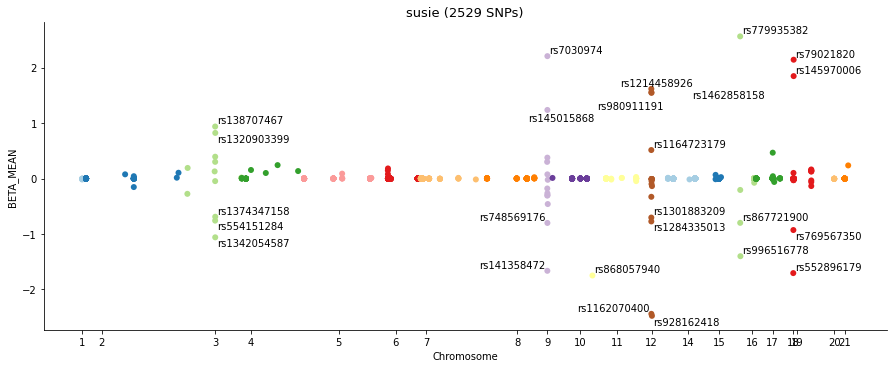

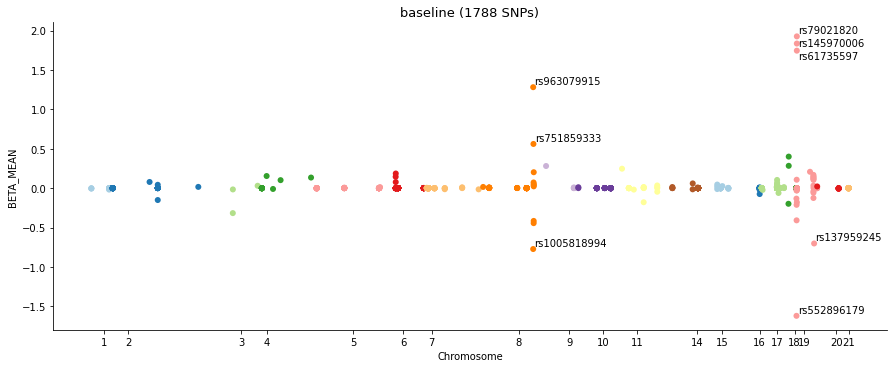

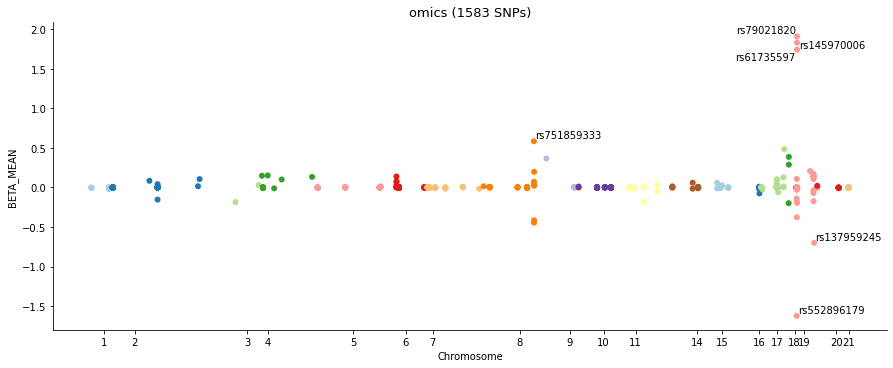

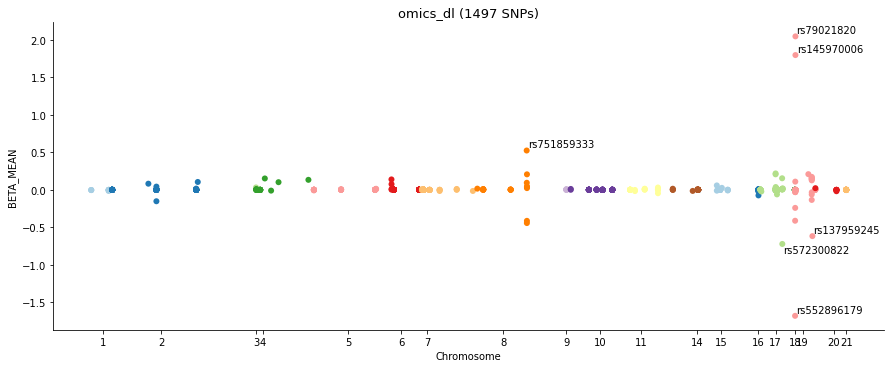

In [5]:
plot_beta(susie,'susie')
plot_beta(baseline,'baseline')
plot_beta(omics, 'omics')
plot_beta(dl, 'omics_dl')

In [7]:
import upsetplot
from upsetplot import plot,from_contents
snp_list = from_contents({'susie':susie.SNP.tolist(),
                          'baseline':baseline.SNP.tolist(),
                          'omcis':omics.SNP.tolist(),
                          'omics_dl':dl.SNP.tolist()}
                         )

In [8]:
snp_list

id
susie baseline omcis omics_dl             
True  True     True  True       rs12037841
                     False        rs679515
      False    False False      rs10863417
      True     True  True        rs4844610
                     True        rs1408077
...                                    ...
False False    False True      rs543413822
                     True        rs3764643
                     True        rs3752228
                     True       rs55969902
                     True       rs12977057

[2899 rows x 1 columns]

In [10]:
only_susie = snp_list.loc[(True, False, False, False)].values.reshape(-1)
only_susie  = susie[susie.SNP.isin(only_susie )]
only_susie.to_csv(path + 'susie_snp.tsv', sep = '\t', index = False)
only_susie

only_functional_snp = snp_list.loc[(False, True,  True, True)].values.reshape(-1)
only_functional = baseline[baseline.SNP.isin(only_functional_snp)]
only_functional.to_csv(path + 'only_functional_snp_bl.tsv', sep = '\t', index = False)

mutual = snp_list.loc[(True, True,  True, True)].values.reshape(-1)
mutual = susie[susie.SNP.isin(mutual)]
mutual.to_csv(path + 'mutual_snp.tsv', sep = '\t', index = False)
mutual

/gpfs/commons/home/tlin/.conda/envs/polyfun/lib/python3.6/site-packages/ipykernel_launcher.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  """Entry point for launching an IPython kernel.


,CHR,BP,SNP,A2,A1,Z,N,P,PIP,BETA_MEAN,BETA_SD,CREDIBLE_SET,MAF,cumulative_pos
2,1,207623552,rs10863417,A,T,-11.62190,487511,3.190000e-31,0.010859,-0.000294,0.002854,chr1:206000001-209000001:1,0.795277,207623552
22,2,9427315,rs72775266,T,C,-4.73284,487511,2.214000e-06,0.006589,-0.000068,0.000873,chr2:8000001-11000001:1,0.206040,217058211
26,2,9435664,rs11680995,G,A,-4.72290,487511,2.325000e-06,0.006482,-0.000067,0.000864,chr2:8000001-11000001:1,0.206502,217066560
28,2,9442713,rs11683637,G,A,-4.71730,487511,2.390000e-06,0.006198,-0.000064,0.000844,chr2:8000001-11000001:1,0.205906,217073609
29,2,9442915,rs11674109,C,T,-4.73220,487511,2.221000e-06,0.006636,-0.000069,0.000876,chr2:8000001-11000001:1,0.206033,217073811
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2518,21,25873388,rs2051181,A,G,-4.58030,487511,4.643000e-06,0.015840,-0.000143,0.001156,chr21:24000001-27000001:1,0.524913,2086642466
2519,21,25874628,rs2040274,C,T,-4.59012,487511,4.430000e-06,0.016063,-0.000145,0.001164,chr21:24000001-27000001:1,0.524551,2086643706
2522,21,25876078,rs2234981,A,G,-4.59613,487511,4.304000e-06,0.016946,-0.000153,0.001199,chr21:24000001-27000001:1,0.524737,2086645156
2523,21,25877114,rs9980932,C,T,-4.54262,487511,5.556000e-06,0.013037,-0.000116,0.001039,chr21:24000001-27000001:1,0.525582,2086646192


{'matrix': <AxesSubplot:>,
 'shading': <AxesSubplot:>,
 'totals': <AxesSubplot:>,
 'intersections': <AxesSubplot:ylabel='Intersection size'>}

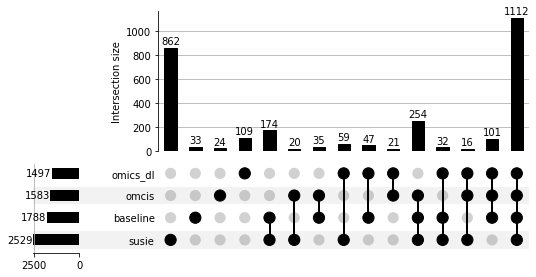

In [14]:
plot(snp_list , show_counts=True)

{'matrix': <AxesSubplot:>,
 'shading': <AxesSubplot:>,
 'totals': <AxesSubplot:>,
 'intersections': <AxesSubplot:ylabel='Intersection size'>}

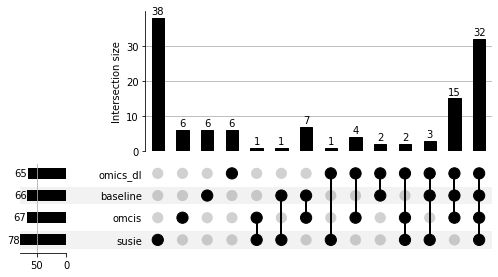

In [15]:
def data_upsetR(df):
    return df[df.PIP >=0.75].SNP.tolist()
snp_list = from_contents({'susie':data_upsetR(susie),
                          'baseline':data_upsetR(baseline),
                          'omcis':data_upsetR(omics),
                          'omics_dl':data_upsetR(dl)}
                         )


plot(snp_list , show_counts=True)

## OCT ver

In [3]:
path = '/gpfs/commons/groups/knowles_lab/data/ADSP_reguloML/PRS/36k_hg38/snp_pip_thres/remove_index0/'
susie = pd.read_csv(path + 'bellenguez_susie.txt', sep = '\t')
baseline = pd.read_csv(path + 'bellenguez_baseline.txt', sep = '\t')
omics  = pd.read_csv(path + 'bellenguez_omics.txt', sep = '\t')
dl= pd.read_csv(path + 'bellenguez_omics_dl.txt', sep = '\t')
basleine = baseline[baseline.MAF >= 0.001]
susie = susie[susie.MAF >= 0.001]
omics = omics[omics.MAF >= 0.001]
dl = dl[dl.MAF >= 0.001]

Text(0, 0.5, 'MAF')

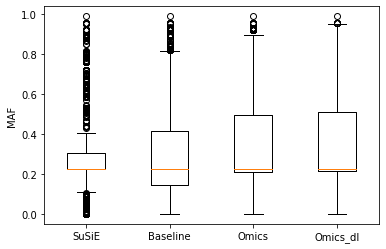

In [34]:
data = [susie.MAF, baseline.MAF, omics.MAF, dl.MAF]
plt.boxplot(data)

plt.xticks([1, 2, 3, 4], ['SuSiE', 'Baseline', 'Omics', 'Omics_dl'])
plt.ylabel('MAF')


In [3]:
basleine = baseline[baseline.MAF >= 0.001]
susie = susie[susie.MAF >= 0.001]
omics = omics[omics.MAF >= 0.001]
dl = dl[dl.MAF >= 0.001]

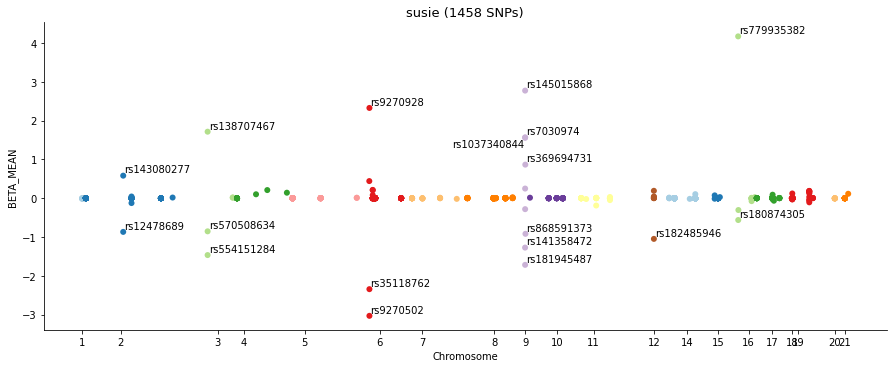

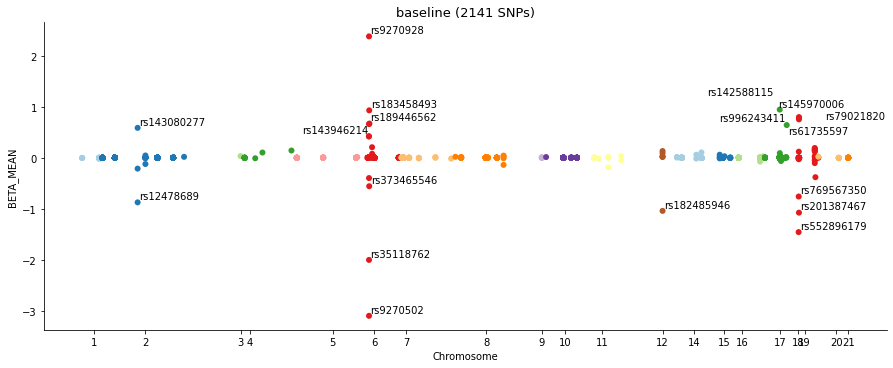

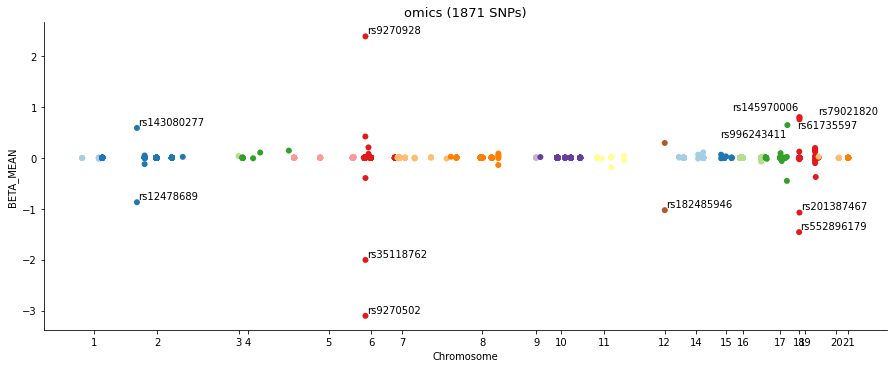

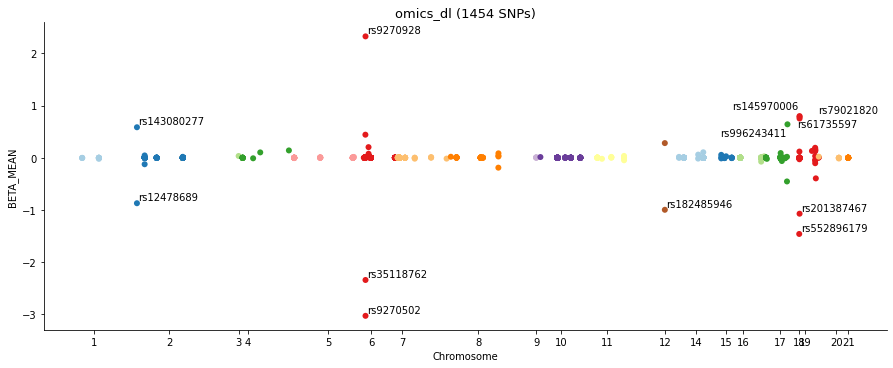

In [41]:
plot_beta(susie,'susie')
plot_beta(baseline,'baseline')
plot_beta(omics, 'omics')
plot_beta(dl, 'omics_dl')

/gpfs/commons/home/tlin/.conda/envs/polyfun/lib/python3.6/site-packages/ipykernel_launcher.py:9: PerformanceWarning: indexing past lexsort depth may impact performance.
  if __name__ == '__main__':
/gpfs/commons/home/tlin/.conda/envs/polyfun/lib/python3.6/site-packages/ipykernel_launcher.py:14: PerformanceWarning: indexing past lexsort depth may impact performance.
  
/gpfs/commons/home/tlin/.conda/envs/polyfun/lib/python3.6/site-packages/ipykernel_launcher.py:18: PerformanceWarning: indexing past lexsort depth may impact performance.


{'matrix': <AxesSubplot:>,
 'shading': <AxesSubplot:>,
 'totals': <AxesSubplot:>,
 'intersections': <AxesSubplot:ylabel='Intersection size'>}

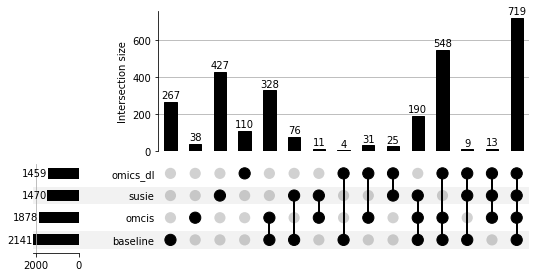

In [5]:
import upsetplot
from upsetplot import plot,from_contents
snp_list = from_contents({'susie':susie.SNP.tolist(),
                          'baseline':baseline.SNP.tolist(),
                          'omcis':omics.SNP.tolist(),
                          'omics_dl':dl.SNP.tolist()}
                         )

only_susie = snp_list.loc[(True, False, False, Fxalse)].values.reshape(-1)
only_susie  = susie[susie.SNP.isin(only_susie)]
only_susie.to_csv(path + 'susie_snp.tsv', sep = '\t', index = False)
only_susie

only_functional_snp = snp_list.loc[(False, True,  True, True)].values.reshape(-1)
only_functional = baseline[baseline.SNP.isin(only_functional_snp)]
only_functional.to_csv(path + 'only_functional_snp_bl.tsv', sep = '\t', index = False)

mutual = snp_list.loc[(True, True,  True, True)].values.reshape(-1)
mutual = susie[susie.SNP.isin(mutual)]
mutual.to_csv(path + 'mutual_snp.tsv', sep = '\t', index = False)
mutual
plot(snp_list , show_counts=True)
#pyplot.savefig("/gpfs/commons/home/tlin/pic/ASHG_24/upsetR_snp_maf_filt.pdf", format="pdf")

### try plotting LD region instead

{'matrix': <AxesSubplot:>,
 'shading': <AxesSubplot:>,
 'totals': <AxesSubplot:>,
 'intersections': <AxesSubplot:ylabel='Intersection size'>}

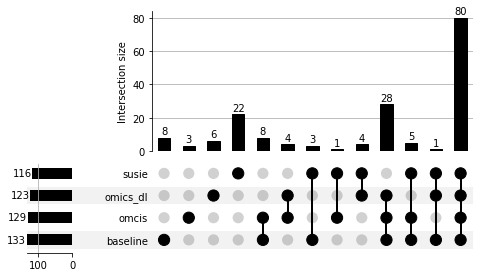

In [4]:
import upsetplot
from upsetplot import plot,from_contents


snp_list = from_contents({'susie':susie.CREDIBLE_SET.unique().tolist(),
                          'baseline':baseline.CREDIBLE_SET.unique().tolist(),
                          'omcis':omics.CREDIBLE_SET.unique().tolist(),
                          'omics_dl':dl.CREDIBLE_SET.unique().tolist()}
                         )

plot(snp_list , show_counts=True)
#plt.savefig("/gpfs/commons/home/tlin/pic/ASHG_24/upsetR_snp_maf_filt_ldblk.pdf", format="pdf")

{'matrix': <AxesSubplot:>,
 'shading': <AxesSubplot:>,
 'totals': <AxesSubplot:>,
 'intersections': <AxesSubplot:ylabel='Intersection size'>}

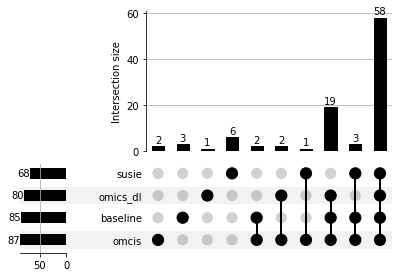

In [5]:
## what if we only cares about the ld, not how many found in that ld
# Remove the part after the last colon
susie['CREDIBLE_SET2'] = susie['CREDIBLE_SET'].str.rsplit(':', n=1).str[0]
baseline['CREDIBLE_SET2'] = baseline['CREDIBLE_SET'].str.rsplit(':', n=1).str[0]
omics['CREDIBLE_SET2'] = omics['CREDIBLE_SET'].str.rsplit(':', n=1).str[0]
dl['CREDIBLE_SET2'] = dl['CREDIBLE_SET'].str.rsplit(':', n=1).str[0]

snp_list2 = from_contents({'susie':susie.CREDIBLE_SET2.unique().tolist(),
                          'baseline':baseline.CREDIBLE_SET2.unique().tolist(),
                          'omcis':omics.CREDIBLE_SET2.unique().tolist(),
                          'omics_dl':dl.CREDIBLE_SET2.unique().tolist()}
                         )

plot(snp_list2 , show_counts=True)
#plt.savefig("/gpfs/commons/home/tlin/pic/ASHG_24/upsetR_snp_maf_filt_ldblk2.pdf", format="pdf")

In [7]:
mutual_blk = snp_list2.loc[(True,True,True,True)].values.reshape(-1)
mutual_blk

/gpfs/commons/home/tlin/.conda/envs/polyfun/lib/python3.6/site-packages/ipykernel_launcher.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  """Entry point for launching an IPython kernel.


array(['chr1:206000001-209000001', 'chr2:104000001-107000001',
       'chr2:126000001-129000001', 'chr2:232000001-235000001',
       'chr3:154000001-157000001', 'chr4:10000001-13000001',
       'chr4:58000001-61000001', 'chr4:138000001-141000001',
       'chr5:13000001-16000001', 'chr5:85000001-88000001',
       'chr5:86000001-89000001', 'chr5:179000001-182000001',
       'chr6:31000001-34000001', 'chr6:39000001-42000001',
       'chr6:40000001-43000001', 'chr6:46000001-49000001',
       'chr6:113000001-116000001', 'chr7:27000001-30000001',
       'chr7:99000001-102000001', 'chr7:142000001-145000001',
       'chr8:26000001-29000001', 'chr8:93000001-96000001',
       'chr8:99000001-102000001', 'chr8:142000001-145000001',
       'chr8:143000001-146000001', 'chr10:10000001-13000001',
       'chr10:58000001-61000001', 'chr10:59000001-62000001',
       'chr10:79000001-82000001', 'chr10:95000001-98000001',
       'chr11:46000001-49000001', 'chr11:59000001-62000001',
       'chr11:85000001-88

In [11]:
print(susie[susie['CREDIBLE_SET2'].isin(mutual_blk)].shape)
print(baseline[baseline['CREDIBLE_SET2'].isin(mutual_blk)].shape)
print(omics[omics['CREDIBLE_SET2'].isin(mutual_blk)].shape)
print(dl[dl['CREDIBLE_SET2'].isin(mutual_blk)].shape)

(1324, 17)
(1021, 18)
(931, 18)
(928, 18)


### check number of SNP in the mutual blocks

In [74]:
susie['source'] = 'susie'
baseline['source'] = 'baseline'
omics['source'] = 'omics'
dl['source'] = 'dl'

susie_filtered = susie[susie['CREDIBLE_SET2'].isin(mutual_blk)]
baseline_filtered = baseline[baseline['CREDIBLE_SET2'].isin(mutual_blk)]
omics_filtered = omics[omics['CREDIBLE_SET2'].isin(mutual_blk)]
dl_filtered = dl[dl['CREDIBLE_SET2'].isin(mutual_blk)]

mutual_blk_snps = pd.concat([susie_filtered, baseline_filtered, omics_filtered, dl_filtered], ignore_index=True)



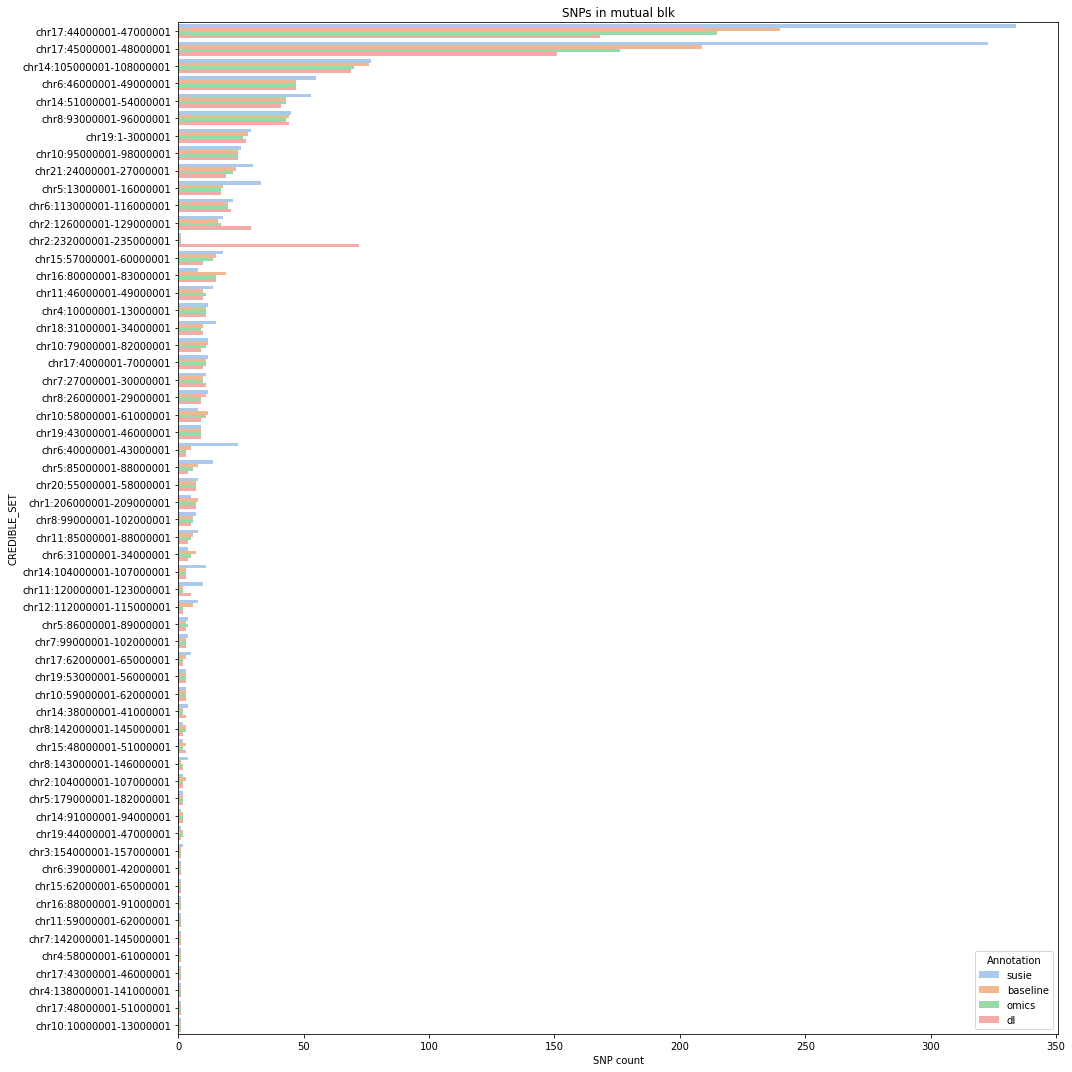

In [80]:
count_df = mutual_blk_snps.groupby(['CREDIBLE_SET2', 'source']).size().reset_index(name='count')

total_counts = count_df.groupby('CREDIBLE_SET2')['count'].sum().sort_values(ascending=False)
count_df['CREDIBLE_SET2'] = pd.Categorical(count_df['CREDIBLE_SET2'], categories=total_counts.index, ordered=True)

# Create a horizontal bar plot with specified legend order
plt.figure(figsize=(15, 15))
sns.barplot(data=count_df, y='CREDIBLE_SET2', x='count', hue='source', palette='pastel', hue_order=['susie', 'baseline', 'omics', 'dl'], dodge=True)

# Customize the plot
plt.ylabel('CREDIBLE_SET')
plt.xlabel('SNP count')
plt.title('SNPs in mutual blk')
plt.legend(title='Annotation', loc='lower right')
plt.tight_layout()
#plt.savefig('/gpfs/commons/home/tlin/pic/ASHG_24/SNPs_IN_mutual_blk_all.pdf') 
plt.show()

/gpfs/commons/home/tlin/.conda/envs/polyfun/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


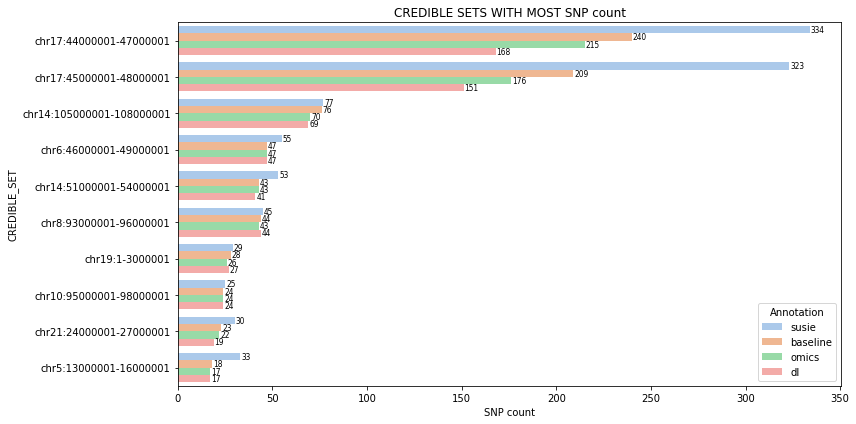

In [84]:

count_df = mutual_blk_snps.groupby(['CREDIBLE_SET2', 'source']).size().reset_index(name='count')
total_counts = count_df.groupby('CREDIBLE_SET2')['count'].sum().nlargest(10)
count_df_top10 = count_df[count_df['CREDIBLE_SET2'].isin(total_counts.index)]

# Sort count_df_top10 by the total count to ensure the order is maintained in the plot
count_df_top10['CREDIBLE_SET2'] = pd.Categorical(count_df_top10['CREDIBLE_SET2'], categories=total_counts.index, ordered=True)

# Define color palette in the order of 'susie', 'baseline', 'omics', 'dl'
palette = {'susie': 'pink', 'baseline': 'green', 'omics': 'blue', 'dl': 'purple'}

# Create a horizontal bar plot for the top 10 CREDIBLE_SET2 values
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    data=count_df_top10, 
    y='CREDIBLE_SET2', 
    x='count', 
    hue='source', 
    palette='pastel', 
    hue_order=['susie', 'baseline', 'omics', 'dl'], 
    dodge=True
)

# Annotate each bar with its count at the end of the bar
for p in ax.patches:
    # Only label bars with positive width (the bars)
    if p.get_width() > 0:
        ax.text(
            p.get_width() + 0.5,  # Position a bit beyond the end of the bar
            p.get_y() + p.get_height() / 2,  # Vertically center the label
            int(p.get_width()),  # Value to label (convert to int for clean display)
            ha='left', va='center', fontsize=7.5  # Align to the left and center
        )

# Customize the plot
plt.ylabel('CREDIBLE_SET')
plt.xlabel('SNP count')
plt.title('CREDIBLE SETS WITH MOST SNP count')
plt.legend(title='Annotation')
plt.tight_layout()
#plt.savefig('/gpfs/commons/home/tlin/pic/ASHG_24/SNPs_IN_mutual_blk.pdf') 
plt.show()

               CREDIBLE_SET2    source  count
0    chr10:10000001-13000001  baseline      1
1    chr10:10000001-13000001        dl      1
2    chr10:10000001-13000001     omics      1
3    chr10:10000001-13000001     susie      1
4    chr10:58000001-61000001  baseline     12
..                       ...       ...    ...
223   chr8:26000001-29000001     susie     12
228  chr8:99000001-102000001  baseline      6
229  chr8:99000001-102000001        dl      5
230  chr8:99000001-102000001     omics      6
231  chr8:99000001-102000001     susie      7

[192 rows x 3 columns]


/gpfs/commons/home/tlin/.conda/envs/polyfun/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


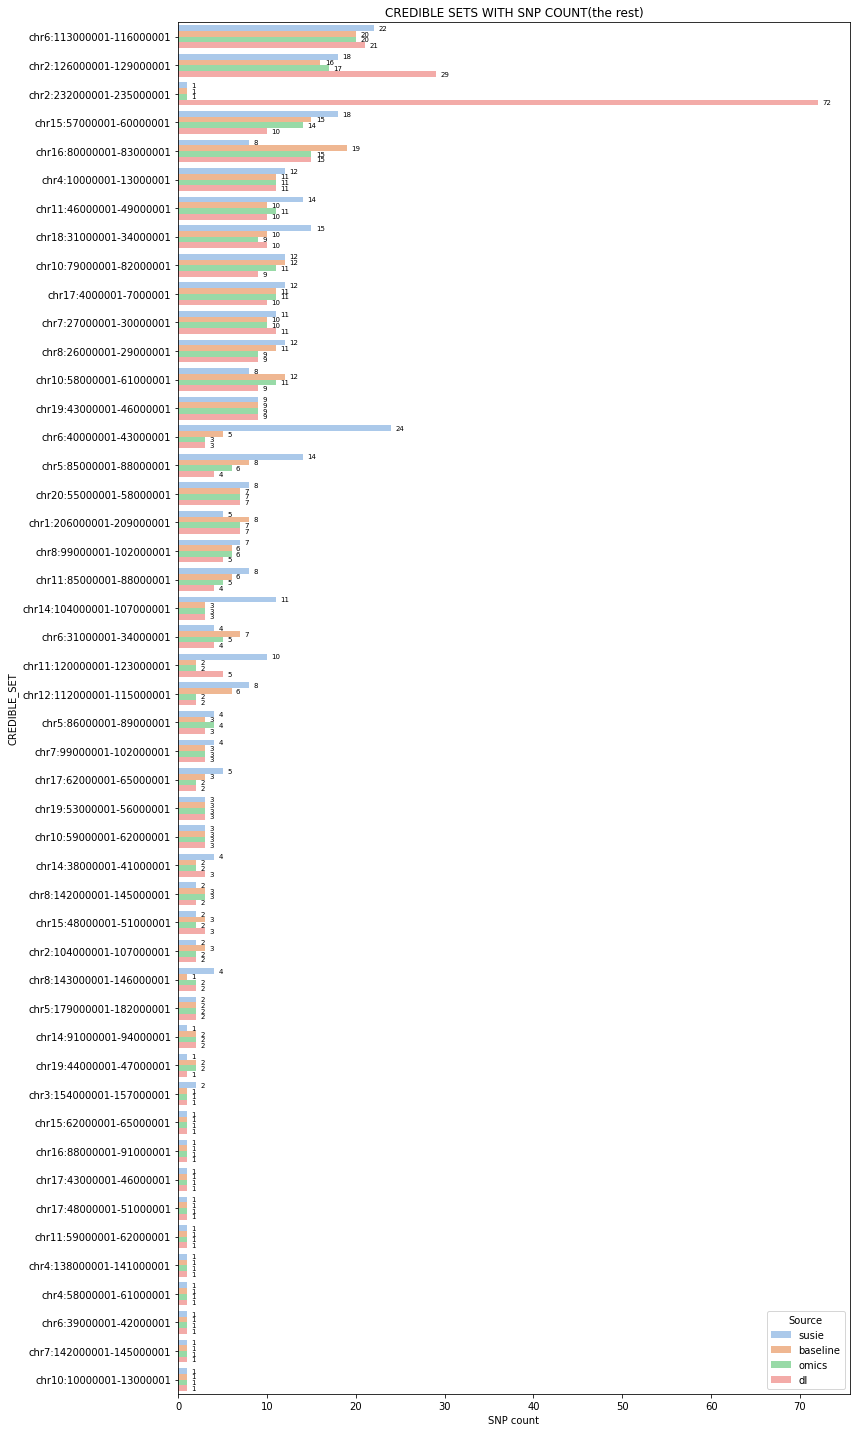

In [85]:
count_df = mutual_blk_snps.groupby(['CREDIBLE_SET2', 'source']).size().reset_index(name='count')
count_df_excluding_top10 = count_df[~count_df['CREDIBLE_SET2'].isin(total_counts.index)]
print(count_df_excluding_top10)
# Sort count_df_excluding_top10 by the total count to maintain the order in the plot
total_counts_remaining = count_df_excluding_top10.groupby('CREDIBLE_SET2')['count'].sum().sort_values(ascending=False)
count_df_excluding_top10['CREDIBLE_SET2'] = pd.Categorical(count_df_excluding_top10['CREDIBLE_SET2'], categories=total_counts_remaining.index, ordered=True)

# Create a horizontal bar plot for all except the top 10 CREDIBLE_SET2 values
plt.figure(figsize=(12, 20))
ax = sns.barplot(
    data=count_df_excluding_top10, 
    y='CREDIBLE_SET2', 
    x='count', 
    hue='source', 
    palette='pastel', 
    hue_order=['susie', 'baseline', 'omics', 'dl'], 
    dodge=True
)

# Annotate each bar with its count at the end of the bar
for p in ax.patches:
     ax.text(
            p.get_width() + 0.5,  # Position a bit beyond the end of the bar
            p.get_y() + p.get_height() / 2,  # Vertically center the label
            int(p.get_width()),  # Value to label (convert to int for clean display)
            ha='left', va='center',  # Align to the left and center
            fontsize=7  # Set a smaller font size
        )
plt.ylabel('CREDIBLE_SET')
plt.xlabel('SNP count')
plt.title('CREDIBLE SETS WITH SNP COUNT(the rest)')
plt.legend(title='Source')
plt.tight_layout()
#plt.savefig('/gpfs/commons/home/tlin/pic/ASHG_24/SNPs_IN_mutual_blk(rest).pdf') 
plt.show()

/gpfs/commons/home/tlin/.conda/envs/polyfun/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


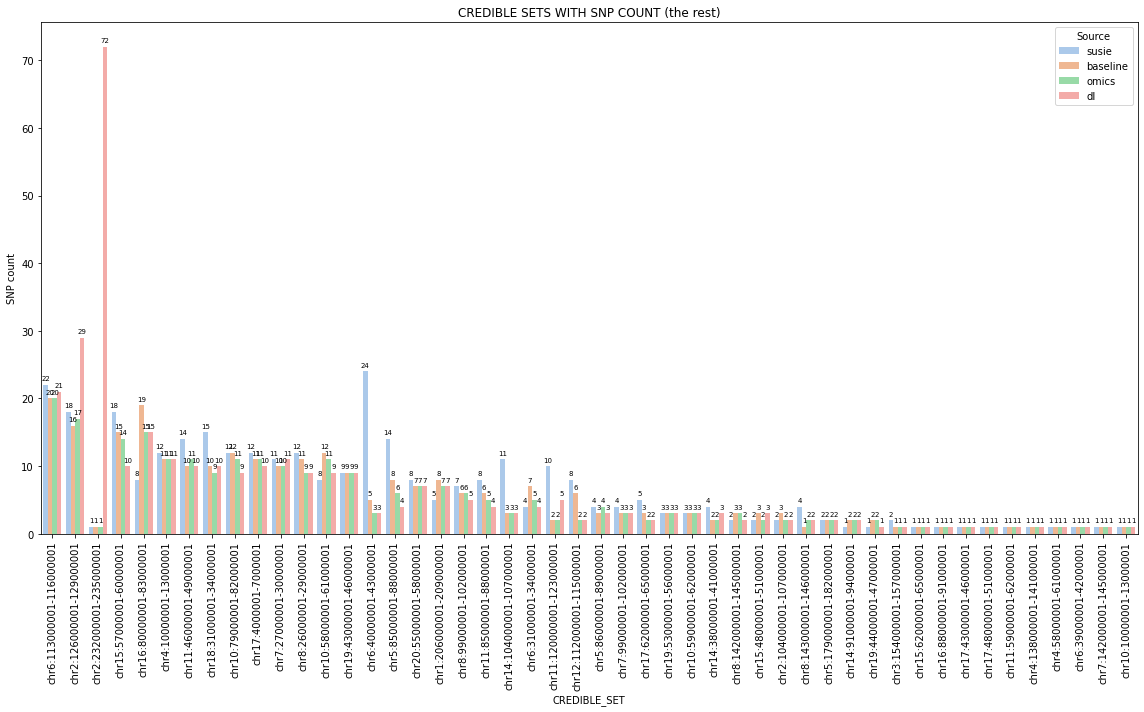

In [93]:
# Sort count_df_excluding_top10 by the total count to maintain the order in the plot
total_counts_remaining = count_df_excluding_top10.groupby('CREDIBLE_SET2')['count'].sum().sort_values(ascending=False)
count_df_excluding_top10['CREDIBLE_SET2'] = pd.Categorical(count_df_excluding_top10['CREDIBLE_SET2'], categories=total_counts_remaining.index, ordered=True)

# Create a vertical bar plot (switch x and y)
plt.figure(figsize=(16, 10))
ax = sns.barplot(
    data=count_df_excluding_top10, 
    x='CREDIBLE_SET2', 
    y='count', 
    hue='source', 
    palette='pastel', 
    hue_order=['susie', 'baseline', 'omics', 'dl'], 
    dodge=True
)

# Annotate each bar with its count at the top of the bar
for p in ax.patches:
    ax.text(
        p.get_x() + p.get_width() / 2,  # Horizontally center the label
        p.get_height() + 0.5,  # Position the label slightly above the top of the bar
        int(p.get_height()),  # Value to label (convert to int for clean display)
        ha='center', va='bottom',  # Align to the center horizontally and to the bottom vertically
        fontsize=7  # Set a smaller font size
    )

# Customize the plot
plt.xlabel('CREDIBLE_SET')
plt.ylabel('SNP count')
plt.xticks(rotation=90)
plt.title('CREDIBLE SETS WITH SNP COUNT (the rest)')
plt.legend(title='Source', loc='upper right')
# Adjust layout and show plot
plt.tight_layout()
plt.savefig('/gpfs/commons/home/tlin/pic/ASHG_24/SNPs_IN_mutual_blk(rest)_horizontal.pdf') 

plt.show()

In [94]:
dl[dl.CREDIBLE_SET2 == 'chr2:232000001-235000001']

,CHR,SNP,BP,A1,A2,SNPVAR,BETA,SE,P,N,MAF,OR,Z,PIP,BETA_MEAN,BETA_SD,CREDIBLE_SET,CREDIBLE_SET2,source
56,2,rs10933431,233117202,G,C,2.974600e-08,0.0852,0.0099,1.043000e-17,486567,0.7657,1.08900,8.6061,0.991416,0.017448,0.002865,chr2:232000001-235000001:1,chr2:232000001-235000001,dl
57,2,rs12694927,233127516,G,A,2.236100e-08,0.0498,0.0082,1.287000e-09,486567,0.4718,1.05100,6.0732,0.003022,0.000015,0.000345,chr2:232000001-235000001:2,chr2:232000001-235000001,dl
58,2,rs12694928,233127983,T,A,9.496600e-09,0.0554,0.0083,1.934000e-11,486567,0.4397,1.05700,6.6747,0.001588,0.000009,0.000264,chr2:232000001-235000001:2,chr2:232000001-235000001,dl
59,2,rs12694929,233128186,T,C,1.235200e-08,0.0500,0.0082,1.049000e-09,486567,0.4817,1.05150,6.0976,0.003669,0.000025,0.000449,chr2:232000001-235000001:2,chr2:232000001-235000001,dl
60,2,rs7589369,233128928,C,G,1.185100e-08,0.0498,0.0082,1.334000e-09,486567,0.4720,1.05150,6.0732,0.001622,0.000008,0.000254,chr2:232000001-235000001:2,chr2:232000001-235000001,dl
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,2,rs6431239,233172293,G,A,1.194100e-09,0.0595,0.0083,5.637000e-13,486567,0.4396,1.06100,7.1687,0.001095,0.000009,0.000279,chr2:232000001-235000001:2,chr2:232000001-235000001,dl
124,2,rs13385922,233172678,C,T,4.154700e-09,-0.0505,0.0083,1.398000e-09,486567,0.3959,0.95100,-6.0843,0.014454,-0.000131,0.001114,chr2:232000001-235000001:2,chr2:232000001-235000001,dl
125,2,rs7568389,233173738,C,G,1.328500e-09,0.0598,0.0083,4.277000e-13,486567,0.4396,1.06160,7.2048,0.001461,0.000012,0.000327,chr2:232000001-235000001:2,chr2:232000001-235000001,dl
126,2,rs7597763,233173931,A,C,1.283200e-09,0.0598,0.0083,4.429000e-13,486567,0.4402,1.06160,7.2048,0.001407,0.000011,0.000320,chr2:232000001-235000001:2,chr2:232000001-235000001,dl


In [98]:
print(omics[omics.CREDIBLE_SET2 == 'chr2:232000001-235000001'].SNP)
print(susie[susie.CREDIBLE_SET2 == 'chr2:232000001-235000001'].SNP)
print(baseline[baseline.CREDIBLE_SET2 == 'chr2:232000001-235000001'].SNP)


406    rs10933431
Name: SNP, dtype: object
113    rs10933431
Name: SNP, dtype: object
578    rs10933431
Name: SNP, dtype: object


In [12]:
only_susie=snp_list2.loc[(True,False, False,False)].values.reshape(-1) ## ONLY IN FUNCTIONAL (19)
susie[(susie.CREDIBLE_SET2.isin(only_susie)) & (susie.PIP > 0.5)]

/gpfs/commons/home/tlin/.conda/envs/polyfun/lib/python3.6/site-packages/ipykernel_launcher.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  """Entry point for launching an IPython kernel.


,CHR,BP,SNP,A2,A1,BETA,SE,P,N,OR,Z,PIP,BETA_MEAN,BETA_SD,CREDIBLE_SET,MAF,CREDIBLE_SET2
114,3,90280130,rs554151284,A,G,-0.4240,0.1524,5.391000e-03,443137,0.654000,-2.78215,1.000000,-1.465451,0.023872,chr3:89000001-92000001:2,0.0018,chr3:89000001-92000001
115,3,90308518,rs138707467,T,C,0.4534,0.1908,1.750000e-02,443137,1.574000,2.37631,1.000000,1.714952,0.029228,chr3:89000001-92000001:3,0.0012,chr3:89000001-92000001
116,3,90308575,rs570508634,G,A,-0.2921,0.1631,7.331000e-02,429855,0.746826,-1.79093,1.000000,-0.853509,0.023870,chr3:89000001-92000001:6,0.0018,chr3:89000001-92000001
134,4,89055173,rs76554426,A,C,0.8842,0.1841,1.563000e-06,443137,2.421000,4.80282,0.999977,0.210015,0.030255,chr4:88000001-91000001:1,0.0011,chr4:88000001-91000001
416,9,32101149,rs141358472,G,C,-0.6220,0.2360,8.405000e-03,429855,0.536769,-2.63559,1.000000,-1.272702,0.031987,chr9:32000001-35000001:4,0.0010,chr9:32000001-35000001
417,9,32189036,rs1037340844,T,G,0.5185,0.2273,2.254000e-02,59942,1.680000,2.28113,1.000000,1.557930,0.031990,chr9:32000001-35000001:9,0.0010,chr9:32000001-35000001
418,9,32214144,rs181945487,A,G,-0.1770,0.1113,1.117000e-01,443137,0.838000,-1.59030,1.000000,-1.717695,0.014482,chr9:32000001-35000001:10,0.0049,chr9:32000001-35000001
419,9,32218325,rs79477159,G,A,-0.2247,0.1165,5.366000e-02,443137,0.798722,-1.92876,1.000000,0.249060,0.015607,chr9:32000001-35000001:2,0.0042,chr9:32000001-35000001
420,9,32225677,rs145015868,G,C,0.6433,0.1487,1.519000e-05,443137,1.901140,4.32616,1.000000,2.774131,0.023857,chr9:32000001-35000001:3,0.0018,chr9:32000001-35000001
421,9,32230624,rs7030974,A,C,0.9109,0.1789,3.560000e-07,443137,2.487000,5.09167,1.000000,1.569522,0.028063,chr9:32000001-35000001:5,0.0013,chr9:32000001-35000001


In [15]:
mutual=snp_list2.loc[(True,True, True,True)].values.reshape(-1) ## ONLY IN FUNCTIONAL (19)
dl[(dl.CREDIBLE_SET2.isin(mutual)) & (dl.PIP > 0.5)]

/gpfs/commons/home/tlin/.conda/envs/polyfun/lib/python3.6/site-packages/ipykernel_launcher.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  """Entry point for launching an IPython kernel.


,CHR,SNP,BP,A1,A2,SNPVAR,BETA,SE,P,N,MAF,OR,Z,PIP,BETA_MEAN,BETA_SD,CREDIBLE_SET,CREDIBLE_SET2
7,1,rs4844610,207629207,A,C,4.567200e-09,-0.1238,0.0104,1.143000e-32,487511,0.8141,0.88339,-11.9040,0.679541,-0.020889,0.014505,chr1:206000001-209000001:1,chr1:206000001-209000001
11,2,rs12478689,105736833,C,T,7.742200e-09,0.1647,0.1148,1.511000e-01,453561,0.0017,1.17900,1.4347,1.000000,-0.871740,0.024569,chr2:104000001-107000001:2,chr2:104000001-107000001
12,2,rs143080277,105749599,T,C,1.189800e-08,0.3915,0.0602,7.885000e-11,475581,0.0051,1.47930,6.5033,1.000000,0.584022,0.014211,chr2:104000001-107000001:1,chr2:104000001-107000001
24,2,rs6710467,127132356,G,A,1.659100e-08,0.0795,0.0112,1.547000e-12,487511,0.1529,1.08300,7.0982,0.873665,0.012196,0.005307,chr2:126000001-129000001:4,chr2:126000001-129000001
25,2,rs186583192,127132858,G,A,6.979500e-09,-0.4544,0.1900,1.680000e-02,443137,0.0018,0.63500,-2.3916,0.983375,-0.124609,0.028365,chr2:126000001-129000001:2,chr2:126000001-129000001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1424,19,rs111784051,44899005,T,G,1.203500e-08,-0.5545,0.0288,1.014000e-82,477993,0.0292,0.57438,-19.2530,1.000000,-0.104956,0.005986,chr19:43000001-46000001:10,chr19:43000001-46000001
1425,19,rs8106813,44928401,A,G,2.597100e-08,-0.1637,0.0096,3.759000e-65,486567,0.4874,0.84890,-17.0520,1.000000,-0.039150,0.002017,chr19:43000001-46000001:4,chr19:43000001-46000001
1426,19,rs114533385,44933496,C,T,2.132400e-08,0.6268,0.0393,3.357000e-57,485999,0.0130,1.87200,15.9490,1.000000,0.148346,0.008897,chr19:43000001-46000001:5,chr19:43000001-46000001
1427,19,rs74359223,45019031,G,A,1.210900e-08,0.5613,0.0375,1.412000e-50,485999,0.0136,1.75300,14.9680,0.995207,0.127149,0.012375,chr19:44000001-47000001:8,chr19:44000001-47000001


In [19]:
dl[(dl.CREDIBLE_SET2.isin(mutual)) & (dl.PIP > 0.5)].SNP.values

array(['rs4844610', 'rs12478689', 'rs143080277', 'rs6710467',
       'rs186583192', 'rs6733839', 'rs10933431', 'rs61762319',
       'rs376291994', 'rs535347112', 'rs62375397', 'rs116347724',
       'rs75668813', 'rs9270502', 'rs35118762', 'rs9270928',
       'rs187370608', 'rs143332484', 'rs4714447', 'rs1859788',
       'rs11769559', 'rs73223431', 'rs562380452', 'rs11786896',
       'rs79832570', 'rs7912495', 'rs1582763', 'rs10792831', 'rs10792832',
       'rs582446', 'rs987482', 'rs11218343', 'rs61943596', 'rs182485946',
       'rs74745468', 'rs12590654', 'rs147042536', 'rs28577986',
       'rs541662922', 'rs2009833', 'rs183428733', 'rs593742',
       'rs117618017', 'rs4407053', 'rs11548656', 'rs72824905',
       'rs1071644', 'rs56407236', 'rs5848', 'rs757502', 'rs9915721',
       'rs9913462', 'rs616338', 'rs572300822', 'rs4292', 'rs552896179',
       'rs12151021', 'rs200538373', 'rs201387467', 'rs61735597',
       'rs145970006', 'rs79021820', 'rs139997344', 'rs12974942',
       'rs37

In [14]:
functional=snp_list2.loc[(False, True, True, True)].values.reshape(-1) ## ONLY IN FUNCTIONAL (19)
dl[(dl.CREDIBLE_SET2.isin(functional)) & (dl.PIP > 0.5)]

/gpfs/commons/home/tlin/.conda/envs/polyfun/lib/python3.6/site-packages/ipykernel_launcher.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  """Entry point for launching an IPython kernel.


,CHR,SNP,BP,A1,A2,SNPVAR,BETA,SE,P,N,MAF,OR,Z,PIP,BETA_MEAN,BETA_SD,CREDIBLE_SET,CREDIBLE_SET2
140,4,rs2245466,40197226,G,C,5.149900e-08,-0.0467,0.0091,3.052000e-07,487511,0.6569,0.95400,-5.1319,0.986225,-0.010762,0.002441,chr4:39000001-42000001:1,chr4:39000001-42000001
341,7,rs12669393,7815748,C,T,7.966900e-08,0.0453,0.0088,2.376000e-07,487511,0.3101,1.04600,5.1477,0.612936,0.006631,0.005542,chr7:6000001-9000001:1,chr7:6000001-9000001
414,7,rs151057105,54877227,C,T,4.939500e-09,-0.0816,0.0140,5.501000e-09,487511,0.0949,0.92200,-5.8286,0.915136,-0.017776,0.006318,chr7:53000001-56000001:1,chr7:53000001-56000001
420,8,rs4731,11808828,A,G,8.605400e-08,0.0793,0.0148,7.639000e-08,486567,0.0814,1.08230,5.3581,0.986856,0.018584,0.004208,chr8:10000001-13000001:1,chr8:10000001-13000001
484,9,rs2244278,104898848,C,A,5.404400e-08,0.0644,0.0122,1.455000e-07,487511,0.1252,1.06700,5.2787,0.533901,0.008177,0.007974,chr9:103000001-106000001:1,chr9:103000001-106000001
1374,17,rs2526377,58332680,A,G,9.891600e-08,-0.0452,0.0082,4.107000e-08,487511,0.4449,0.95602,-5.5122,0.862075,-0.009288,0.004166,chr17:57000001-60000001:1,chr17:57000001-60000001
1378,17,rs996243411,64778608,G,A,5.936800e-09,0.3141,0.1906,9.935000e-02,429855,0.0012,1.36900,1.6480,1.000000,0.640254,0.029219,chr17:63000001-66000001:3,chr17:63000001-66000001
1428,19,rs137959245,46653831,G,A,8.160600e-09,-0.8183,0.1929,2.205000e-05,443137,0.0015,0.44100,-4.2421,0.999997,-0.395491,0.026090,chr19:45000001-48000001:9,chr19:45000001-48000001
1432,20,rs144693124,408274,G,C,4.310500e-08,0.0892,0.0180,6.720000e-07,487511,0.0589,1.09300,4.9556,0.961206,0.020975,0.005910,chr20:1-3000001:1,chr20:1-3000001


In [32]:
snp_list2.loc[(False, False, True, True)].values.reshape(-1) ##chr10:121000001-124000001 PIP are very small in both omics and dl

/gpfs/commons/home/tlin/.conda/envs/polyfun/lib/python3.6/site-packages/ipykernel_launcher.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  """Entry point for launching an IPython kernel.


array(['chr10:121000001-124000001', 'chr17:6000001-9000001'], dtype=object)

In [43]:
dl[dl.CREDIBLE_SET == 'chr17:6000001-9000001:1']

,CHR,SNP,BP,A1,A2,SNPVAR,BETA,SE,P,N,MAF,OR,Z,PIP,BETA_MEAN,BETA_SD,CREDIBLE_SET,CREDIBLE_SET2
1042,17,rs9901675,7581494,G,A,1.152500e-07,-0.0938,0.0189,7.253000e-07,486567,0.0492,0.91,-4.963,0.950865,-0.021237,0.006585,chr17:6000001-9000001:1,chr17:6000001-9000001


In [44]:
dl[dl.CREDIBLE_SET == 'chr17:6000001-9000001:1']

,CHR,SNP,BP,A1,A2,SNPVAR,BETA,SE,P,N,MAF,OR,Z,PIP,BETA_MEAN,BETA_SD,CREDIBLE_SET,CREDIBLE_SET2
1042,17,rs9901675,7581494,G,A,1.152500e-07,-0.0938,0.0189,7.253000e-07,486567,0.0492,0.91,-4.963,0.950865,-0.021237,0.006585,chr17:6000001-9000001:1,chr17:6000001-9000001


In [27]:
snp_list.loc[(True, True, False, True)].values.reshape(-1) ## ONLY IN not in omics  (2)

/gpfs/commons/home/tlin/.conda/envs/polyfun/lib/python3.6/site-packages/ipykernel_launcher.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  """Entry point for launching an IPython kernel.


array(['chr6:32000001-35000001:4', 'chr21:24000001-27000001:1'],
      dtype=object)

In [8]:
dl[dl.SNP.isin(snp_list.loc[(True, False, False, True)].values.reshape(-1))]

/gpfs/commons/home/tlin/.conda/envs/polyfun/lib/python3.6/site-packages/ipykernel_launcher.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  """Entry point for launching an IPython kernel.


,CHR,SNP,BP,A1,A2,SNPVAR,BETA,SE,P,N,MAF,OR,Z,PIP,BETA_MEAN,BETA_SD,CREDIBLE_SET
150,5,rs25945,14680138,G,A,4.484500e-08,-0.0750,0.0158,2.155000e-06,487511,0.9189,0.92800,-4.7468,0.048585,-0.000736,0.003526,chr5:13000001-16000001:1
151,5,rs31919,14691477,C,T,1.702100e-08,-0.0760,0.0159,1.637000e-06,487511,0.9187,0.92700,-4.7799,0.021199,-0.000327,0.002384,chr5:13000001-16000001:1
322,6,rs2349215,114311371,G,A,9.040500e-10,-0.0418,0.0085,1.015000e-06,487511,0.6477,0.95900,-4.9176,0.005268,-0.000051,0.000729,chr6:113000001-116000001:1
467,8,rs10081474,94973681,C,A,9.903200e-09,0.0461,0.0081,1.212000e-08,487511,0.5094,1.04700,5.6914,0.007624,0.000075,0.000925,chr8:93000001-96000001:1
711,10,rs73318809,96246624,C,G,3.201200e-08,-0.1090,0.0214,3.495000e-07,487511,0.0390,0.89686,-5.0935,0.028556,-0.000704,0.004281,chr10:95000001-98000001:1
763,11,rs10838705,47403380,G,A,4.755800e-08,0.0547,0.0083,3.724000e-11,487511,0.3997,1.05600,6.5904,0.085586,0.001099,0.003687,chr11:46000001-49000001:1
776,11,rs7112662,121520369,A,G,5.464300e-08,0.1026,0.0189,5.829000e-08,487511,0.0483,1.10860,5.4286,0.023769,0.000764,0.005099,chr11:120000001-123000001:3
1081,17,rs17691556,45891802,T,A,1.221300e-08,-0.0543,0.0098,2.717000e-08,487511,0.2259,0.94700,-5.5408,0.000852,-0.000048,0.001763,chr17:44000001-47000001:5
1200,17,rs62063789,45984532,T,C,9.453500e-09,-0.0542,0.0098,3.045000e-08,487511,0.2257,0.94697,-5.5306,0.000533,-0.000029,0.001368,chr17:44000001-47000001:5
1203,17,rs919464,45988535,C,T,1.737400e-08,-0.0543,0.0098,2.863000e-08,487511,0.2256,0.94700,-5.5408,0.001341,-0.000076,0.002231,chr17:44000001-47000001:5


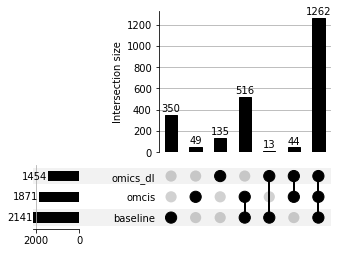

In [44]:
snp_list_fun = from_contents({'baseline':baseline.SNP.tolist(),
                          'omcis':omics.SNP.tolist(),
                          'omics_dl':dl.SNP.tolist()}
                         )


plot(snp_list_fun , show_counts=True)
pyplot.savefig("/gpfs/commons/home/tlin/pic/ASHG_24/upsetR_snp_fun_maf_filt.pdf", format="pdf")

In [48]:
functional_no_dl= baseline[baseline.SNP.isin(snp_list_fun.loc[(True, True, False)].values.reshape(-1))]
functional_no_dl.to_csv(path + 'functional_bl_omics_bl.tsv', sep = '\t', index = False)

/gpfs/commons/home/tlin/.conda/envs/polyfun/lib/python3.6/site-packages/ipykernel_launcher.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  """Entry point for launching an IPython kernel.


### check picalm

In [23]:
baseline[(baseline.CHR == 11) & (baseline.CREDIBLE_SET2 == 'chr11:85000001-88000001')]    

,CHR,SNP,BP,A1,A2,SNPVAR,BETA,SE,P,N,MAF,OR,Z,PIP,BETA_MEAN,BETA_SD,CREDIBLE_SET,CREDIBLE_SET2
1248,11,rs914227393,86036972,G,A,1.040200e-09,-0.1977,0.2502,4.293000e-01,429855,0.0010,0.8210,-0.79017,0.997086,-0.188749,0.033159,chr11:85000001-88000001:1,chr11:85000001-88000001
1249,11,rs3844143,86139201,C,T,4.937100e-08,0.0969,0.0081,5.522000e-33,487511,0.5105,1.1020,11.96300,0.597549,0.008808,0.007414,chr11:85000001-88000001:3,chr11:85000001-88000001
1250,11,rs10792831,86141937,G,A,4.697500e-08,0.0973,0.0081,4.205000e-33,487511,0.5273,1.1020,12.01200,0.333407,0.004850,0.006990,chr11:85000001-88000001:3,chr11:85000001-88000001
1251,11,rs7952506,86146597,T,C,3.621300e-08,0.0954,0.0081,6.708000e-32,487511,0.5297,1.1001,11.77800,0.041037,0.000544,0.002746,chr11:85000001-88000001:3,chr11:85000001-88000001
1252,11,rs10792832,86156833,A,G,4.229600e-08,0.1056,0.0084,6.334000e-36,487511,0.6422,1.1111,12.57100,0.802817,0.016513,0.008413,chr11:85000001-88000001:2,chr11:85000001-88000001
1253,11,rs3851179,86157598,T,C,1.372200e-08,0.1054,0.0084,6.496000e-36,487511,0.6416,1.1111,12.54800,0.194671,0.003977,0.008162,chr11:85000001-88000001:2,chr11:85000001-88000001


In [22]:
susie[(susie.CHR == 11) & (susie.CREDIBLE_SET2 == 'chr11:85000001-88000001')]    

,CHR,BP,SNP,A2,A1,BETA,SE,P,N,OR,Z,PIP,BETA_MEAN,BETA_SD,CREDIBLE_SET,MAF,CREDIBLE_SET2
489,11,86036972,rs914227393,A,G,-0.1977,0.2502,4.293000e-01,429855,0.82100,-0.790168,0.999021,-0.188223,0.032124,chr11:85000001-88000001:1,0.0010,chr11:85000001-88000001
490,11,86139201,rs3844143,T,C,0.0969,0.0081,5.522000e-33,487511,1.10200,11.963000,0.506373,0.007435,0.007480,chr11:85000001-88000001:3,0.5105,chr11:85000001-88000001
491,11,86141937,rs10792831,A,G,0.0973,0.0081,4.205000e-33,487511,1.10200,12.012300,0.305375,0.004445,0.006799,chr11:85000001-88000001:3,0.5273,chr11:85000001-88000001
492,11,86146597,rs7952506,C,T,0.0954,0.0081,6.708000e-32,487511,1.10011,11.777800,0.051799,0.000725,0.003143,chr11:85000001-88000001:3,0.5297,chr11:85000001-88000001
493,11,86147455,rs3851178,T,G,0.0955,0.0081,5.740000e-32,487511,1.10000,11.790100,0.059956,0.000842,0.003377,chr11:85000001-88000001:3,0.5282,chr11:85000001-88000001
494,11,86149263,rs9787874,A,G,0.0957,0.0081,4.793000e-32,487511,1.10000,11.814800,0.069715,0.000982,0.003635,chr11:85000001-88000001:3,0.5275,chr11:85000001-88000001
495,11,86156833,rs10792832,G,A,0.1056,0.0084,6.334000e-36,487511,1.11111,12.571400,0.548873,0.011398,0.010453,chr11:85000001-88000001:2,0.6422,chr11:85000001-88000001
496,11,86157598,rs3851179,C,T,0.1054,0.0084,6.496000e-36,487511,1.11111,12.547600,0.428891,0.008879,0.010342,chr11:85000001-88000001:2,0.6416,chr11:85000001-88000001


In [21]:
omics[(omics.CHR == 11) & (omics.CREDIBLE_SET2 == 'chr11:85000001-88000001')]    

,CHR,SNP,BP,A1,A2,SNPVAR,BETA,SE,P,N,MAF,OR,Z,PIP,BETA_MEAN,BETA_SD,CREDIBLE_SET,CREDIBLE_SET2
1089,11,rs914227393,86036972,G,A,4.480500e-10,-0.1977,0.2502,4.293000e-01,429855,0.0010,0.8210,-0.79017,0.993227,-0.188028,0.035108,chr11:85000001-88000001:1,chr11:85000001-88000001
1090,11,rs3844143,86139201,C,T,6.945000e-08,0.0969,0.0081,5.522000e-33,487511,0.5105,1.1020,11.96300,0.605549,0.008936,0.007409,chr11:85000001-88000001:3,chr11:85000001-88000001
1091,11,rs10792831,86141937,G,A,6.920700e-08,0.0973,0.0081,4.205000e-33,487511,0.5273,1.1020,12.01200,0.358408,0.005214,0.007127,chr11:85000001-88000001:3,chr11:85000001-88000001
1092,11,rs10792832,86156833,A,G,5.923700e-08,0.1056,0.0084,6.334000e-36,487511,0.6422,1.1111,12.57100,0.757518,0.015510,0.008989,chr11:85000001-88000001:2,chr11:85000001-88000001
1093,11,rs3851179,86157598,T,C,2.562900e-08,0.1054,0.0084,6.496000e-36,487511,0.6416,1.1111,12.54800,0.242104,0.004917,0.008794,chr11:85000001-88000001:2,chr11:85000001-88000001


In [20]:
dl[(dl.CHR == 11) & (dl.CREDIBLE_SET2 == 'chr11:85000001-88000001')]   

,CHR,SNP,BP,A1,A2,SNPVAR,BETA,SE,P,N,MAF,OR,Z,PIP,BETA_MEAN,BETA_SD,CREDIBLE_SET,CREDIBLE_SET2
770,11,rs3844143,86139201,C,T,8.855100e-08,0.0969,0.0081,5.522000e-33,487511,0.5105,1.1020,11.963,0.274395,0.003582,0.006004,chr11:85000001-88000001:2,chr11:85000001-88000001
771,11,rs10792831,86141937,G,A,1.717200e-07,0.0973,0.0081,4.205000e-33,487511,0.5273,1.1020,12.012,0.704981,0.009421,0.006389,chr11:85000001-88000001:2,chr11:85000001-88000001
772,11,rs10792832,86156833,A,G,1.263900e-07,0.1056,0.0084,6.334000e-36,487511,0.6422,1.1111,12.571,0.894662,0.015498,0.005709,chr11:85000001-88000001:1,chr11:85000001-88000001
773,11,rs3851179,86157598,T,C,1.989700e-08,0.1054,0.0084,6.496000e-36,487511,0.6416,1.1111,12.548,0.107553,0.001829,0.005357,chr11:85000001-88000001:1,chr11:85000001-88000001


In [17]:
dl[(dl.CHR == 11) & (dl.BP <86069084)& (dl.BP > 85957175)]    

,CHR,SNP,BP,A1,A2,SNPVAR,BETA,SE,P,N,MAF,OR,Z,PIP,BETA_MEAN,BETA_SD,CREDIBLE_SET


In [24]:
dl[(dl.SNP == 'rs914227393')]   

,CHR,SNP,BP,A1,A2,SNPVAR,BETA,SE,P,N,MAF,OR,Z,PIP,BETA_MEAN,BETA_SD,CREDIBLE_SET,CREDIBLE_SET2


## oct before maf filter

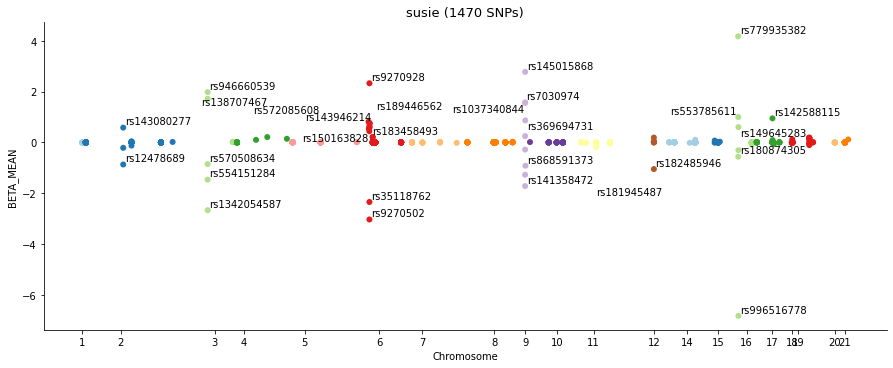

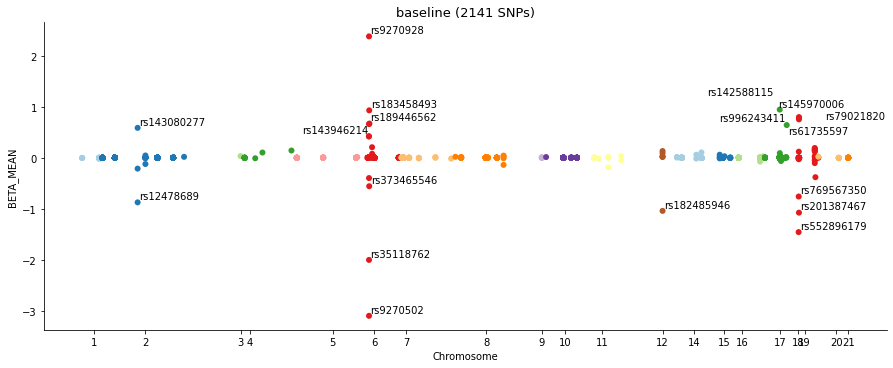

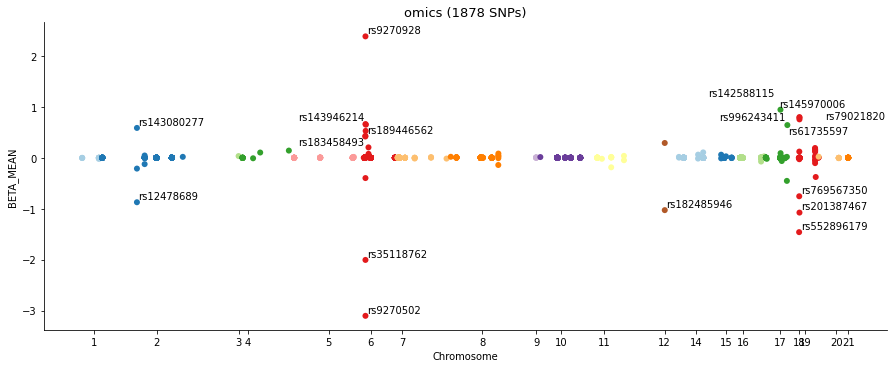

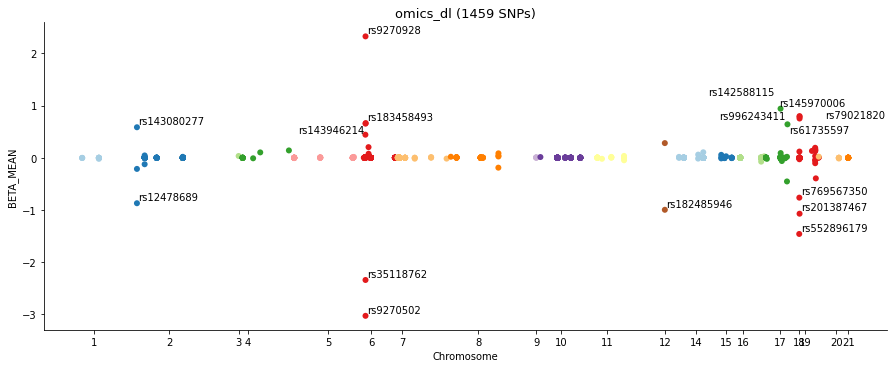

In [6]:
## before maf filter
plot_beta(susie,'susie')
plot_beta(baseline,'baseline')
plot_beta(omics, 'omics')
plot_beta(dl, 'omics_dl')

/gpfs/commons/home/tlin/.conda/envs/polyfun/lib/python3.6/site-packages/ipykernel_launcher.py:9: PerformanceWarning: indexing past lexsort depth may impact performance.
  if __name__ == '__main__':
/gpfs/commons/home/tlin/.conda/envs/polyfun/lib/python3.6/site-packages/ipykernel_launcher.py:14: PerformanceWarning: indexing past lexsort depth may impact performance.
  
/gpfs/commons/home/tlin/.conda/envs/polyfun/lib/python3.6/site-packages/ipykernel_launcher.py:18: PerformanceWarning: indexing past lexsort depth may impact performance.


{'matrix': <AxesSubplot:>,
 'shading': <AxesSubplot:>,
 'totals': <AxesSubplot:>,
 'intersections': <AxesSubplot:ylabel='Intersection size'>}

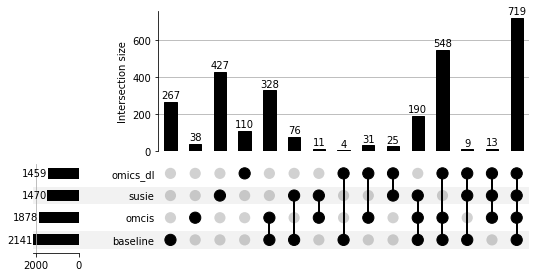

In [7]:
import upsetplot
from upsetplot import plot,from_contents
snp_list = from_contents({'susie':susie.SNP.tolist(),
                          'baseline':baseline.SNP.tolist(),
                          'omcis':omics.SNP.tolist(),
                          'omics_dl':dl.SNP.tolist()}
                         )

only_susie = snp_list.loc[(True, False, False, False)].values.reshape(-1)
only_susie  = susie[susie.SNP.isin(only_susie)]
only_susie.to_csv(path + 'susie_snp.tsv', sep = '\t', index = False)
only_susie

only_functional_snp = snp_list.loc[(False, True,  True, True)].values.reshape(-1)
only_functional = baseline[baseline.SNP.isin(only_functional_snp)]
only_functional.to_csv(path + 'only_functional_snp_bl.tsv', sep = '\t', index = False)

mutual = snp_list.loc[(True, True,  True, True)].values.reshape(-1)
mutual = susie[susie.SNP.isin(mutual)]
mutual.to_csv(path + 'mutual_snp.tsv', sep = '\t', index = False)
mutual
plot(snp_list , show_counts=True)

In [19]:
only_susie[abs(only_susie.BETA_MEAN) > 0.5]


,CHR,BP,SNP,A2,A1,BETA,SE,P,N,OR,Z,PIP,BETA_MEAN,BETA_SD,CREDIBLE_SET,MAF,cumulative_pos
114,3,90280130,rs554151284,A,G,-0.4240,0.1524,5.391000e-03,443137,0.654000,-2.782150,1.000000,-1.465451,0.023872,chr3:89000001-92000001:2,0.0018,531026739
115,3,90308518,rs138707467,T,C,0.4534,0.1908,1.750000e-02,443137,1.574000,2.376310,1.000000,1.714952,0.029228,chr3:89000001-92000001:3,0.0012,531055127
116,3,90308575,rs570508634,G,A,-0.2921,0.1631,7.331000e-02,429855,0.746826,-1.790930,1.000000,-0.853509,0.023870,chr3:89000001-92000001:6,0.0018,531055184
117,3,90382886,rs946660539,C,A,1.3000,0.6760,5.446000e-02,42140,3.663000,1.923080,0.999379,1.978983,0.070648,chr3:89000001-92000001:5,0.0004,531129495
118,3,90468185,rs1342054587,A,G,-1.0177,0.4477,2.302000e-02,42140,0.361000,-2.273170,1.000000,-2.664979,0.058423,chr3:89000001-92000001:4,0.0003,531214794
189,6,30362250,rs572085608,T,C,0.5587,0.3352,9.557000e-02,429855,1.748000,1.666770,1.000000,0.814365,0.057869,chr6:30000001-33000001:5,0.0003,946042541
190,6,31116850,rs150163828,T,C,0.7532,0.2112,3.621000e-04,429855,2.124000,3.566290,0.999571,0.548896,0.042458,chr6:30000001-33000001:4,0.0006,946797141
416,9,32101149,rs141358472,G,C,-0.6220,0.2360,8.405000e-03,429855,0.536769,-2.635590,1.000000,-1.272702,0.031987,chr9:32000001-35000001:4,0.0010,1349695795
417,9,32189036,rs1037340844,T,G,0.5185,0.2273,2.254000e-02,59942,1.680000,2.281130,1.000000,1.557930,0.031990,chr9:32000001-35000001:9,0.0010,1349783682
418,9,32214144,rs181945487,A,G,-0.1770,0.1113,1.117000e-01,443137,0.838000,-1.590300,1.000000,-1.717695,0.014482,chr9:32000001-35000001:10,0.0049,1349808790


In [21]:
only_functional[abs(baseline.BETA_MEAN) > 0.5]


/gpfs/commons/home/tlin/.conda/envs/polyfun/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,CHR,SNP,BP,A1,A2,SNPVAR,BETA,SE,P,N,MAF,OR,Z,PIP,BETA_MEAN,BETA_SD,CREDIBLE_SET,cumulative_pos
2056,17,rs996243411,64778608,G,A,1.399300e-12,0.3141,0.1906,0.099350,429855,0.0012,1.369,1.64800,1.000000,0.640842,0.029217,chr17:63000001-66000001:3,2094230544
2067,19,rs552896179,531477,C,A,1.016500e-07,-0.9086,0.2785,0.001106,443137,0.0012,0.403,-3.26250,1.000000,-1.458354,0.029219,chr19:1-3000001:6,2126904740
2068,19,rs769567350,813200,G,A,2.025800e-08,-0.5810,0.2430,0.016830,443137,0.0007,0.559,-2.39090,0.979003,-0.760681,0.117641,chr19:1-3000001:4,2127186463
2078,19,rs201387467,1466100,C,T,3.296400e-08,-0.1379,0.2080,0.507200,443137,0.0010,0.871,-0.66298,1.000000,-1.076892,0.031996,chr19:1-3000001:8,2127839363
2079,19,rs61735597,1466146,G,A,2.894800e-08,0.8693,0.2134,0.000046,429855,0.0021,2.385,4.07360,1.000000,0.752696,0.022092,chr19:1-3000001:3,2127839409
2080,19,rs145970006,1467279,G,A,2.932900e-08,0.8806,0.2143,0.000040,429855,0.0021,2.412,4.10920,1.000000,0.796581,0.022093,chr19:1-3000001:5,2127840542
2081,19,rs79021820,1469079,G,A,4.447000e-08,0.8600,0.2133,0.000055,429855,0.0021,2.363,4.03190,1.000000,0.785081,0.022093,chr19:1-3000001:7,2127842342


In [8]:
snp_list


id
susie baseline omcis omics_dl             
True  True     True  True       rs12037841
                     False        rs679515
               False False      rs10863417
      False    False False      rs10863418
      True     True  True        rs4844610
...                                    ...
False False    False True        rs2286649
                     True       rs11657314
                     True        rs9953463
                     True        rs3752228
                     True      rs540337613

[2796 rows x 1 columns]

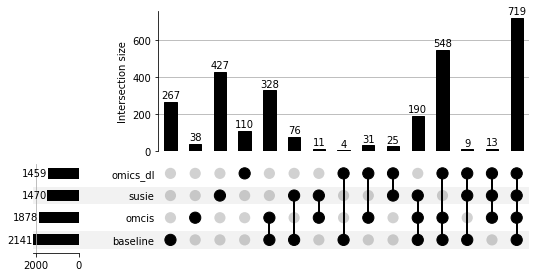

In [11]:
from matplotlib import pyplot
plot(snp_list , show_counts=True)
pyplot.savefig("/gpfs/commons/home/tlin/pic/ASHG_24/upsetR_snp.pdf", format="pdf")

{'matrix': <AxesSubplot:>,
 'shading': <AxesSubplot:>,
 'totals': <AxesSubplot:>,
 'intersections': <AxesSubplot:ylabel='Intersection size'>}

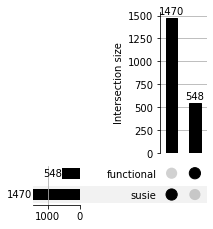

In [13]:
## try 2 way:
## functional vs susie


snp_list_susie_fun = from_contents({'susie':susie.SNP.tolist(),
                          'functional':only_functional.SNP.tolist()}
                         )

plot(snp_list_susie_fun , show_counts=True)

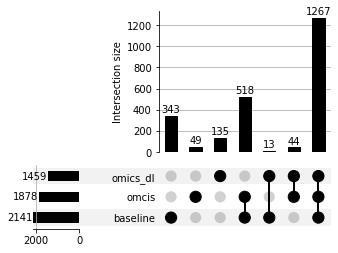

In [15]:
snp_list_fun = from_contents({'baseline':baseline.SNP.tolist(),
                          'omcis':omics.SNP.tolist(),
                          'omics_dl':dl.SNP.tolist()}
                         )


plot(snp_list_fun , show_counts=True)
pyplot.savefig("/gpfs/commons/home/tlin/pic/ASHG_24/upsetR_snp_fun.pdf", format="pdf")

In [17]:
## not in DL
snp_list_fun.loc[(True, True, False)].values.reshape(-1)

/gpfs/commons/home/tlin/.conda/envs/polyfun/lib/python3.6/site-packages/ipykernel_launcher.py:2: PerformanceWarning: indexing past lexsort depth may impact performance.
  


array(['rs679515', 'rs11537589', 'rs10169262', 'rs55793962', 'rs62118844',
       'rs56005407', 'rs28568480', 'rs56130210', 'rs16867025',
       'rs11690247', 'rs4436931', 'rs4516401', 'rs62118846', 'rs55643539',
       'rs55685911', 'rs56063038', 'rs11691132', 'rs11675922',
       'rs72775268', 'rs10209023', 'rs10209595', 'rs7607741',
       'rs59425633', 'rs61332043', 'rs56753567', 'rs10176656',
       'rs56177557', 'rs35584910', 'rs59018063', 'rs41264175',
       'rs34753951', 'rs62119381', 'rs62119384', 'rs55790676',
       'rs2177639', 'rs11684747', 'rs1549387', 'rs1863219', 'rs35299907',
       'rs10196064', 'rs10199805', 'rs1425039', 'rs1425040', 'rs1549385',
       'rs1425042', 'rs6711049', 'rs7576644', 'rs7562850', 'rs7587700',
       'rs7580539', 'rs7580661', 'rs7595044', 'rs11902489', 'rs6735206',
       'rs12623149', 'rs10209829', 'rs6432539', 'rs6714899', 'rs6714917',
       'rs6734085', 'rs4665090', 'rs4635484', 'rs10198053', 'rs918969',
       'rs13389096', 'rs12470879',